# Insurance Claim Fraud Detection Project No 6

### Problem Statement:

Insurance fraud is a huge problem in the industry, It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto detection industry with this problem.

The database is providing which will help to get the details of the policy with customers details and the claim details which has the details of incident claimed by customers.

In the dataset, we will work to demostrate the model by which it will easy to predict of insurance claim is fraudulent or not.

### Importing the important libraries and dataset

In [1]:
#importing libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset
df = pd.read_csv(r'C:\Users\govind\Desktop\Automobile_insurance_fraud.csv')

In [3]:
# Display the dataset of first & last 5 rows
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

### EDA

In [4]:
# Let's see the detail of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Details: 

- There are 21 object columns and 19 are numerical columns


- There is no null values in the columns except _c39 but have to check each columns individually and the _c39 column also.


- If _c39 columns is full of 'NaN', we have to treat the column, and other columns have '?' signs so we have to treat them too.


- the target or Label which is fraud_reported is also having categorical data and needs to be treated

In [5]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [6]:
# Columns names
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [7]:
# Treated the null by the drop function to remove that one column with all nulls

df = df.dropna(how = 'all',axis = 1)

In [8]:
df # _C39 columns is dropped

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... witnesses police_report_available total_claim_amount  \
0         466132  ...         2                     YES              71610   
1         468176  ...         0                       ?               5070   
2         430632  ...         3                      NO              34650   
3         608117  ...         2                      NO              63400   
4         610706  ...         1                      NO               6500   
..           ...  ...       ...                     ...                ...   
995       431289  ...         1                       ?              87200   
996       608177  ...         3                       ?             108480   
997       442797  ...         3                     YES              67500   
998       441714  ...         1                     YES              46980   
999       612260  ...         3                       ?               5060   

    injury_claim property_claim  vehicle_claim   auto_make auto_model  \
0           6510          13020          52080        Saab        92x   
1            780            780           3510    Mercedes       E400   
2           7700           3850          23100       Dodge        RAM   
3           6340           6340          50720   Chevrolet      Tahoe   
4           1300            650           4550      Accura        RSX   
..           ...            ...            ...         ...        ...   
995        17440           8720          61040       Honda     Accord   
996        18080          18080          72320  Volkswagen     Passat   
997         7500           7500          52500      Suburu    Impreza   
998         5220           5220          36540        Audi         A5   
999          460            920           3680    Mercedes       E400   

    auto_year fraud_reported  
0        2004              Y  
1        2007              Y  
2        2007              N  
3        2014              Y  
4        2009              N  
..        ...            ...  
995      2006              N  
996      2015              N  
997      1996              N  
998      1998              N  
999      200

In [9]:
# Let's check duplicate values
df.drop_duplicates(inplace=True) 

In [10]:
# No duplicates present in dataset and check the shape

df.shape

(1000, 39)

In [11]:
# Check the datatypes of the columns
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [12]:
# describing the data

df.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  
count     1000.000000    1000.000000  1000.000000  
mean      7399.570000   37928.950000  2005.103000  
std       4824.726179   18886.252893     6.015861  
min          0.000000      70.000000  1995.000000  
25%       4445.000000   30292.500000  2000.000000  
50%       6750.000000   42100.000000  2005.000000  
75%      10885.000000   50822.500000  2010.000000  
max      23670.000000   79560.000000  2015.000000

Observations:-

    - We see that the 1st column shows extreme values where the min is 0 and the highest is 479 which can cause some issues , STD is really high too , which means ouliers are present
    
    - policy number,insured zip is just an index as in the id so we can consider
    
    - umberella limit also havs very extreme range and the STD is higher that the mean which means its gotta have many outliers
    
    - we see the same issue with capital gains and capital loss where the outlies are too high
    
    - we see many categorical columns here as well like no of calls affected , witnesses, bodility injuries , etc
    
    - we see that the total claim amount has the same skewness issue as well as very extreme range and may have a lot of outliers
    
    - the breakup of the total claim ammount also shows to have min 0 in all 3 and we see the higher side has extreme outliers in the column

In [13]:
# Checking to see the unique values in the columns
df['months_as_customer'].nunique()

391

In [14]:
df['age'].nunique()

46

In [15]:
df['policy_number'].nunique() # This is the number of policy, it is not so useful in dataset so we can remove the dataset

1000

In [16]:
df['policy_bind_date'].nunique() # This columns as well not so useful, have to remove

951

In [17]:
df['policy_state'].unique()


array(['OH', 'IN', 'IL'], dtype=object)

In [18]:
df['policy_csl'].unique()

array(['250/500', '100/300', '500/1000'], dtype=object)

In [19]:
df['policy_deductable'].unique()

array([1000, 2000,  500], dtype=int64)

In [20]:
df['policy_annual_premium'].nunique()

991

In [21]:
df['umbrella_limit'].unique()

array([       0,  5000000,  6000000,  4000000,  3000000,  8000000,
        7000000,  9000000, 10000000, -1000000,  2000000], dtype=int64)

In [22]:
df['insured_zip'].nunique()   # column having the zip codes of the holders can be dropped 

995

In [23]:
df['insured_sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [24]:
df['insured_zip'].nunique()

995

In [25]:
df['insured_education_level'].unique()

array(['MD', 'PhD', 'Associate', 'Masters', 'High School', 'College',
       'JD'], dtype=object)

In [26]:
df['insured_occupation'].unique()

array(['craft-repair', 'machine-op-inspct', 'sales', 'armed-forces',
       'tech-support', 'prof-specialty', 'other-service',
       'priv-house-serv', 'exec-managerial', 'protective-serv',
       'transport-moving', 'handlers-cleaners', 'adm-clerical',
       'farming-fishing'], dtype=object)

In [27]:
df['insured_hobbies'].unique() # This column having hobbies so it can be dropped 

array(['sleeping', 'reading', 'board-games', 'bungie-jumping',
       'base-jumping', 'golf', 'camping', 'dancing', 'skydiving',
       'movies', 'hiking', 'yachting', 'paintball', 'chess', 'kayaking',
       'polo', 'basketball', 'video-games', 'cross-fit', 'exercise'],
      dtype=object)

In [28]:
df['insured_relationship'].unique()

array(['husband', 'other-relative', 'own-child', 'unmarried', 'wife',
       'not-in-family'], dtype=object)

In [29]:
df['capital-gains'].nunique()

338

In [30]:
df['capital-loss'].nunique()

354

In [31]:
df['incident_date'].nunique()

60

In [32]:
df['collision_type'].nunique()

4

In [33]:
df['incident_type'].nunique()

4

In [34]:
df['incident_severity'].nunique()

4

In [35]:
df['authorities_contacted'].nunique()

5

In [36]:
df['incident_state'].nunique()

7

In [37]:
df['incident_city'].nunique()

7

In [38]:
df['incident_location'].nunique() # This column having location so it can be dropped 

1000

In [39]:
df['incident_hour_of_the_day'].nunique()

24

In [40]:
df['number_of_vehicles_involved'].unique()

array([1, 3, 4, 2], dtype=int64)

In [41]:
df['property_damage'].unique()

array(['YES', '?', 'NO'], dtype=object)

In [42]:
df['witnesses'].unique()

array([2, 0, 3, 1], dtype=int64)

In [43]:
df['police_report_available'].unique()

array(['YES', '?', 'NO'], dtype=object)

In [44]:
df['total_claim_amount'].nunique()

763

In [45]:
df['injury_claim'].nunique()

638

In [46]:
df['property_claim'].nunique()

626

In [47]:
df['vehicle_claim'].nunique()

726

In [48]:
df['auto_make'].nunique()

14

In [49]:
df['auto_model'].nunique()

39

In [50]:
df['auto_year'].nunique()

21

In [51]:
df['fraud_reported'].unique() #this is again a categorical column having the target variable

array(['Y', 'N'], dtype=object)

In [52]:
# dropping the columns 

df= df.drop(['policy_number','policy_bind_date','insured_zip','insured_hobbies','incident_location'],axis=1)

In [53]:
df

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                   328   48           OH    250/500               1000   
1                   228   42           IN    250/500               2000   
2                   134   29           OH    100/300               2000   
3                   256   41           IL    250/500               2000   
4                   228   44           IL   500/1000               1000   
..                  ...  ...          ...        ...                ...   
995                   3   38           OH   500/1000               1000   
996                 285   41           IL    100/300               1000   
997                 130   34           OH    250/500                500   
998                 458   62           IL   500/1000               2000   
999                 456   60           OH    250/500               1000   

     policy_annual_premium  umbrella_limit insured_sex  \
0                  1406.91               0        MALE   
1                  1197.22         5000000        MALE   
2                  1413.14         5000000      FEMALE   
3                  1415.74         6000000      FEMALE   
4                  1583.91         6000000        MALE   
..                     ...             ...         ...   
995                1310.80               0      FEMALE   
996                1436.79               0      FEMALE   
997                1383.49         3000000      FEMALE   
998                1356.92         5000000        MALE   
999                 766.19               0      FEMALE   

    insured_education_level insured_occupation  ... witnesses  \
0                        MD       craft-repair  ...         2   
1                        MD  machine-op-inspct  ...         0   
2                       PhD              sales  ...         3   
3                       PhD       armed-forces  ...         2   
4                 Associate              sales  ...         1   
..                      ...                ...  ...       ...   
995                 Masters       craft-repair  ...         1   
996                     PhD     prof-specialty  ...         3   
997                 Masters       armed-forces  ...         3   
998               Associate  handlers-cleaners  ...         1   
999               Associate              sales  ...         3   

     police_report_available  total_claim_amount injury_claim property_claim  \
0                        YES               71610         6510          13020   
1                          ?                5070          780            780   
2                         NO               34650         7700           3850   
3                         NO               63400         6340           6340   
4                         NO                6500         1300            650   
..                       ...                 ...          ...            ...   
995                        ?               87200        17440           8720   
996                        ?              108480        18080          18080   
997                      YES               67500         7500           7500   
998                      YES               46980         5220           5220   
999                        ?                5060          460            920   

    vehicle_claim   auto_make auto_model auto_year fraud_reported  
0           52080        Saab        92x      2004              Y  
1            3510    Mercedes       E400      2007              Y  
2           23100       Dodge        RAM      2007              N  
3           50720   Chevrolet      Tahoe      2014              Y  
4            4550      Accura        RSX      2009              N  
..            ...         ...        ...       ...            ...  
995         61040       Honda     Accord      2006              N  
996         72320  Volkswagen     Passat      2015              N  
997         52500      Suburu    Impreza      1996   

In [54]:
# Checking the unique values in each column

for col in df:
    print(df[col].nunique(),'\n')

391 

46 

3 

3 

3 

991 

11 

2 

7 

14 

6 

338 

354 

60 

4 

4 

4 

5 

7 

7 

24 

4 

3 

3 

4 

3 

763 

638 

626 

726 

14 

39 

21 

2 



Observations made in individual columns cells above.

- Overall there is a huge variation in the type of data , but the columns are all having pretty straightforward contents as we can make out what each means moving to next step

In [55]:
# Checking to see if any of the values in Target  is white spaces

df.loc[df['fraud_reported'] == " "]  # No white space is detected

Empty DataFrame
Columns: [months_as_customer, age, policy_state, policy_csl, policy_deductable, policy_annual_premium, umbrella_limit, insured_sex, insured_education_level, insured_occupation, insured_relationship, capital-gains, capital-loss, incident_date, incident_type, collision_type, incident_severity, authorities_contacted, incident_state, incident_city, incident_hour_of_the_day, number_of_vehicles_involved, property_damage, bodily_injuries, witnesses, police_report_available, total_claim_amount, injury_claim, property_claim, vehicle_claim, auto_make, auto_model, auto_year, fraud_reported]
Index: []

[0 rows x 34 columns]

### Visualization of the Data

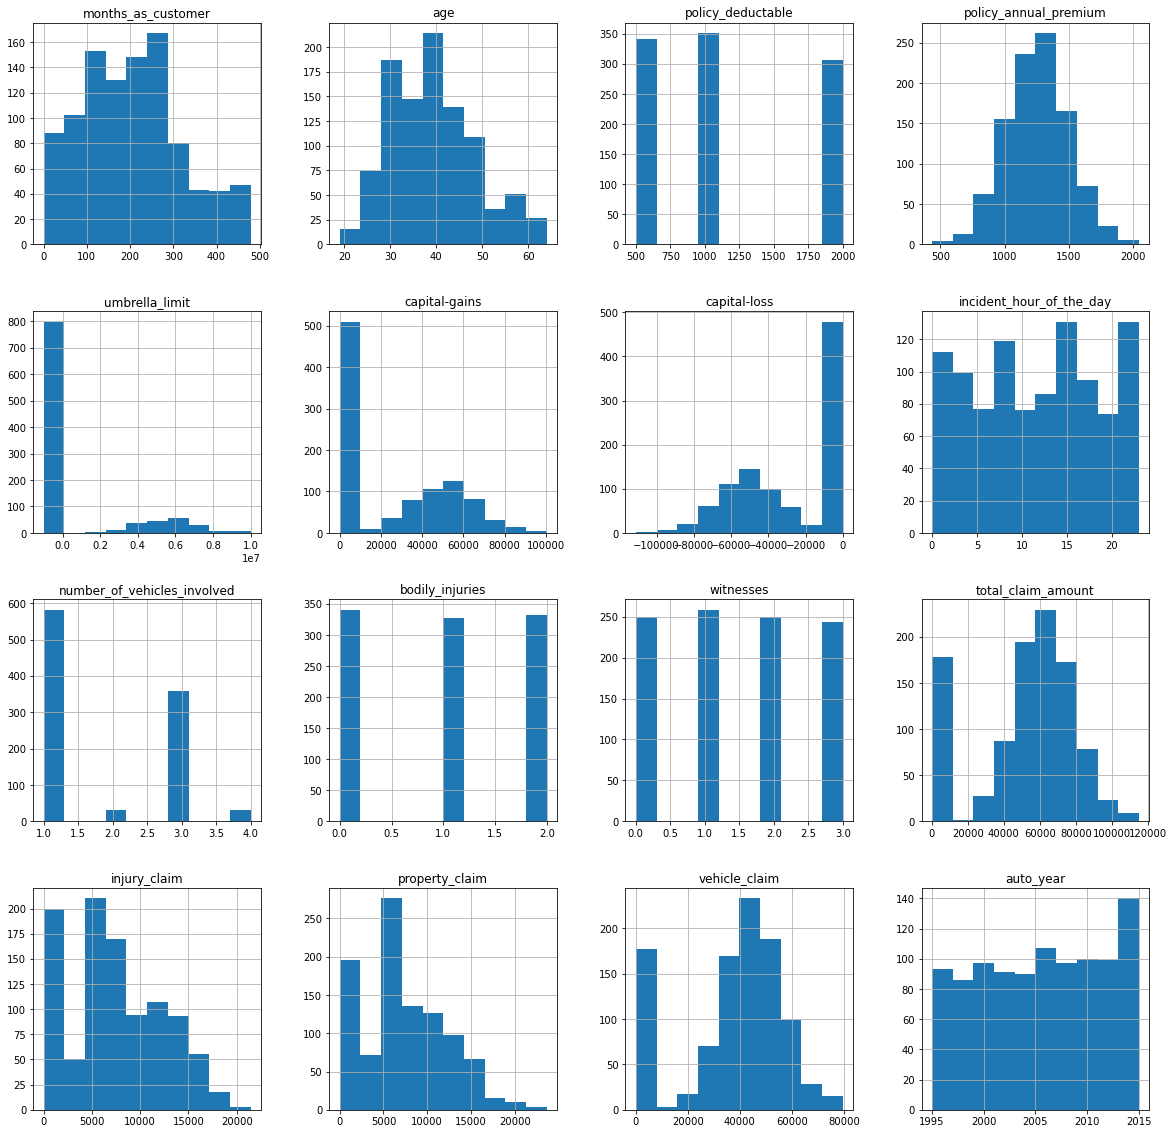

In [56]:
df.hist(figsize=(20,20))
plt.show()

 For better understanding the columns we have to bifercate the columns individually.
 
 First of all, Splitting the columns with categorical and numerica data

In [57]:
# We are defining the categorical and numerical columns

categorical_features = [feature for feature in df.columns if df[feature].dtype =='O']

numerical_features = [feature for feature in df.columns if df[feature].dtype !='O']

print("we have {} categorical features : {}".format(len(categorical_features),categorical_features))
print("\nwe have {} numerical fatures: {}".format(len(numerical_features),numerical_features))

we have 18 categorical features : ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']

we have 16 numerical fatures: ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']


In [58]:
df_visualization_continuous=df[['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']].copy()

In [59]:
df_visualization_nominal=df[['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']]

### Visualization of the distribution of the continuous value of the float and int columns.

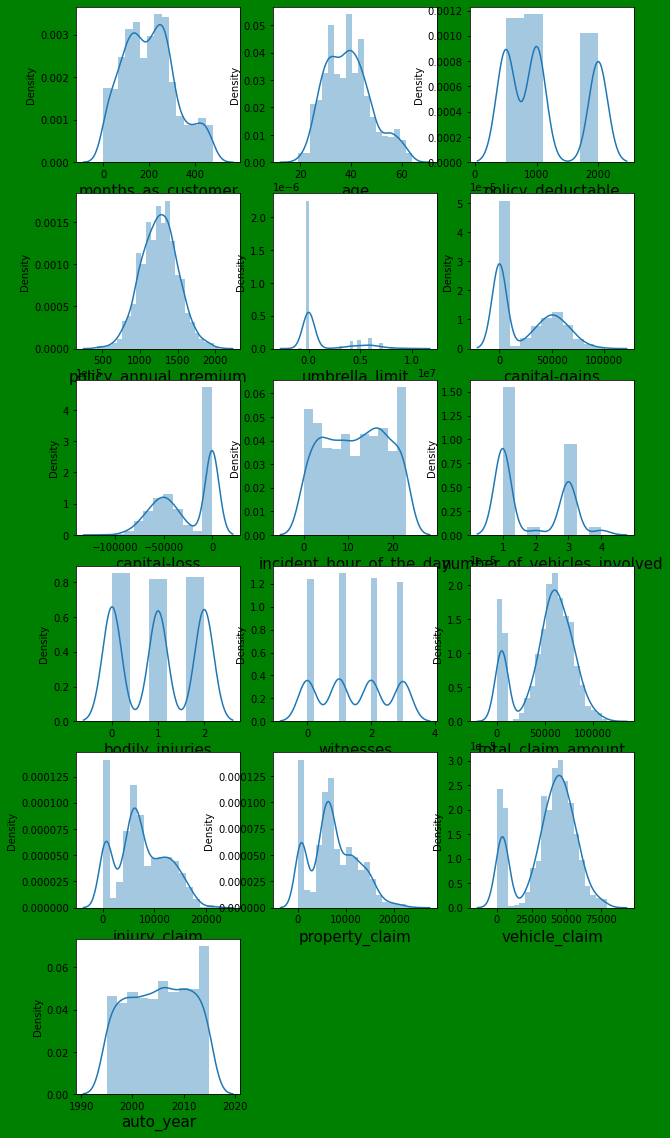

In [60]:
plt.figure(figsize = (10,20),facecolor='green')
plotnumber=1

for column in df_visualization_continuous:
    if plotnumber <=16:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(df_visualization_continuous[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
    
plt.show()

Observations :
- the columns umberalla limit,'capital-gains','capital-loss' has right and left skewness


-  the same with 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim' has skewness

- the columns months_as_customer', 'age',policy_annual_premium, and auto year have normal distribution

### treating the target varoiables as Y = 1 and N = 0

In [61]:
df['fraud_reported'] = df['fraud_reported'].factorize(['Y','N'])[0]

In [62]:
df

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                   328   48           OH    250/500               1000   
1                   228   42           IN    250/500               2000   
2                   134   29           OH    100/300               2000   
3                   256   41           IL    250/500               2000   
4                   228   44           IL   500/1000               1000   
..                  ...  ...          ...        ...                ...   
995                   3   38           OH   500/1000               1000   
996                 285   41           IL    100/300               1000   
997                 130   34           OH    250/500                500   
998                 458   62           IL   500/1000               2000   
999                 456   60           OH    250/500               1000   

     policy_annual_premium  umbrella_limit insured_sex  \
0                  1406.91               0        MALE   
1                  1197.22         5000000        MALE   
2                  1413.14         5000000      FEMALE   
3                  1415.74         6000000      FEMALE   
4                  1583.91         6000000        MALE   
..                     ...             ...         ...   
995                1310.80               0      FEMALE   
996                1436.79               0      FEMALE   
997                1383.49         3000000      FEMALE   
998                1356.92         5000000        MALE   
999                 766.19               0      FEMALE   

    insured_education_level insured_occupation  ... witnesses  \
0                        MD       craft-repair  ...         2   
1                        MD  machine-op-inspct  ...         0   
2                       PhD              sales  ...         3   
3                       PhD       armed-forces  ...         2   
4                 Associate              sales  ...         1   
..                      ...                ...  ...       ...   
995                 Masters       craft-repair  ...         1   
996                     PhD     prof-specialty  ...         3   
997                 Masters       armed-forces  ...         3   
998               Associate  handlers-cleaners  ...         1   
999               Associate              sales  ...         3   

     police_report_available  total_claim_amount injury_claim property_claim  \
0                        YES               71610         6510          13020   
1                          ?                5070          780            780   
2                         NO               34650         7700           3850   
3                         NO               63400         6340           6340   
4                         NO                6500         1300            650   
..                       ...                 ...          ...            ...   
995                        ?               87200        17440           8720   
996                        ?              108480        18080          18080   
997                      YES               67500         7500           7500   
998                      YES               46980         5220           5220   
999                        ?                5060          460            920   

    vehicle_claim   auto_make auto_model auto_year fraud_reported  
0           52080        Saab        92x      2004              1  
1            3510    Mercedes       E400      2007              1  
2           23100       Dodge        RAM      2007              0  
3           50720   Chevrolet      Tahoe      2014              1  
4            4550      Accura        RSX      2009              0  
..            ...         ...        ...       ...            ...  
995         61040       Honda     Accord      2006              0  
996         72320  Volkswagen     Passat      2015              0  
997         52500      Suburu    Impreza      1996   

N    753
Y    247
Name: fraud_reported, dtype: int64


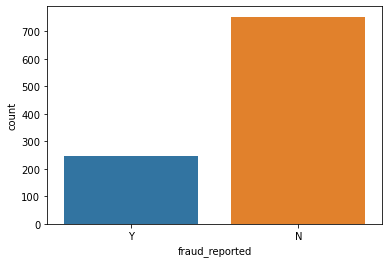

In [63]:
# Visualizing the Target Variable
ax = sns.countplot(x='fraud_reported',data=df_visualization_nominal)
print(df_visualization_nominal['fraud_reported'].value_counts())

0    753
1    247
Name: fraud_reported, dtype: int64


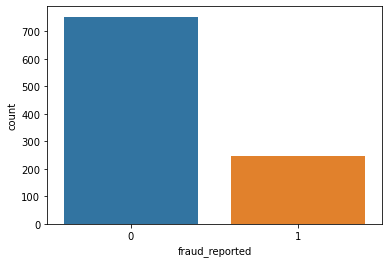

In [64]:
# Visualizing the Target Variable
ax = sns.countplot(x='fraud_reported',data = df)
print(df['fraud_reported'].value_counts())

In [65]:
import plotly.graph_objs as pl
import plotly.offline as py

less_50 = df[(df['fraud_reported'] != 0)]
more_50 = df[(df['fraud_reported'] == 0)]

trace = pl.Pie(labels = ['fraud_reported is No','fraud_reported is Yes'],values = df['fraud_reported'].value_counts(),
               textfont=dict(size=15),
               marker=dict(colors=['blue','yellow'],
               line=dict(color='#000000',width=1.5)))
layout = dict(title = 'Distrubution of fraud_reported variable')

fig = dict(data=[trace],layout=layout)
py.iplot(fig)

Observations :-

We see a huge imbalance in the label column where the applicants whose loan is approved is 75.3% and the ones whose isnt is 24.7% so we need to balance this

<AxesSubplot:xlabel='months_as_customer', ylabel='Density'>

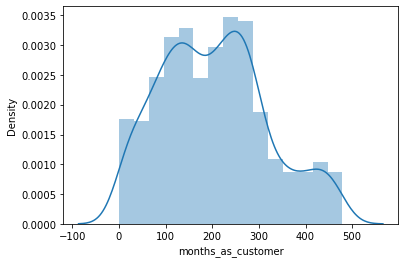

In [66]:
#Lets graph the data for columns individually so we can make clear findings

sns.distplot(df_visualization_continuous['months_as_customer'],kde=True)

<AxesSubplot:xlabel='months_as_customer', ylabel='Count'>

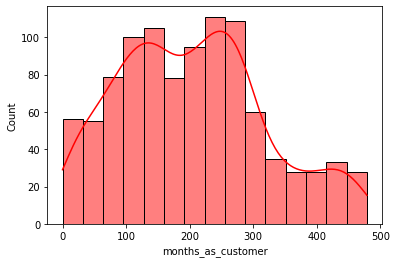

In [67]:
sns.histplot(df_visualization_continuous['months_as_customer'],kde=True,color='r')

We see that the data is right skewed and we see some outliers in the dataset , we see the max range is 0-500 approx , need to treat to get a better look at the data but overall good distribution

<AxesSubplot:xlabel='age', ylabel='Density'>

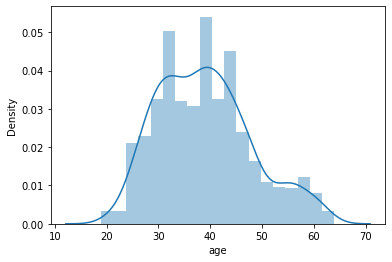

In [68]:
sns.distplot(df_visualization_continuous['age'],kde=True)

<AxesSubplot:xlabel='age', ylabel='Count'>

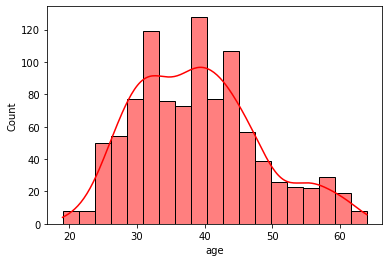

In [69]:
sns.histplot(df_visualization_continuous['age'],kde=True,color='r')

We see overall we have a normal distribution but there are some outliers in the dataset ,we see highest age group is 30 to 40

<AxesSubplot:xlabel='age', ylabel='count'>

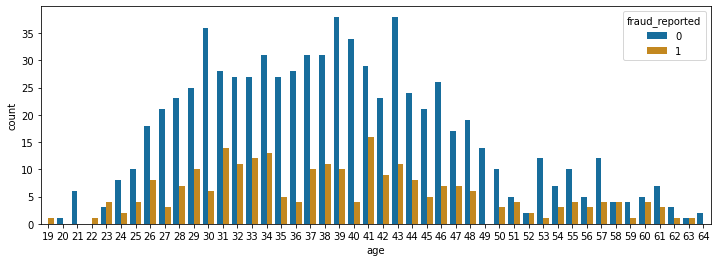

In [70]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,4))
sns.countplot(x="age", hue="fraud_reported", data=df, palette="colorblind")

the most frauds are in agegroup between 30 and 45 approx and as per ratio we see much higher at 55 to 60 as well

<AxesSubplot:xlabel='policy_deductable', ylabel='Density'>

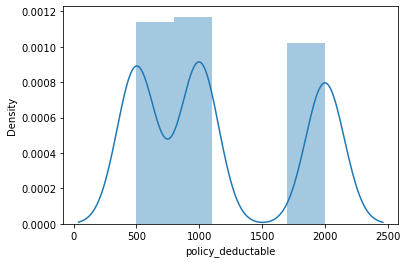

In [71]:
sns.distplot(df_visualization_continuous['policy_deductable'],kde=True)

<AxesSubplot:xlabel='policy_deductable', ylabel='Count'>

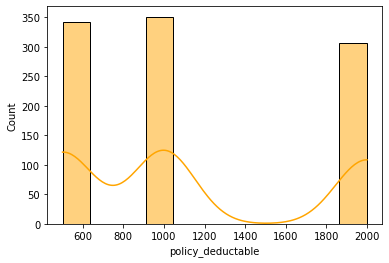

In [72]:
sns.histplot(df_visualization_continuous['policy_deductable'],kde=True,color='orange')

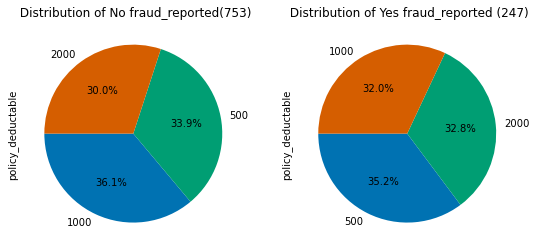

In [73]:
yes_group = df[df["fraud_reported"]== 0]
no_group = df[df["fraud_reported"]!= 0]

fig=plt.figure(figsize=(9,9))
plt.style.use('seaborn-colorblind')
fig.add_subplot(2,2,1)
yes_group["policy_deductable"].value_counts().plot(kind="pie",  subplots=True,autopct='%1.1f%%', startangle=180)

plt.title(' Distribution of No fraud_reported('+str(len(yes_group))+')');

fig.add_subplot(2,2,2)
no_group["policy_deductable"].value_counts().plot(kind="pie",  subplots=True,autopct='%1.1f%%', startangle=180)

plt.title(' Distribution of Yes fraud_reported ('+str(len(no_group))+')');

We see almost equal distribution of fraud here , but the highest is 500 for fraud and no its 1000

<AxesSubplot:xlabel='policy_annual_premium', ylabel='Density'>

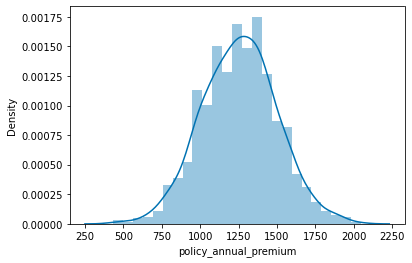

In [74]:
sns.distplot(df_visualization_continuous['policy_annual_premium'],kde=True)

<AxesSubplot:xlabel='policy_annual_premium', ylabel='Count'>

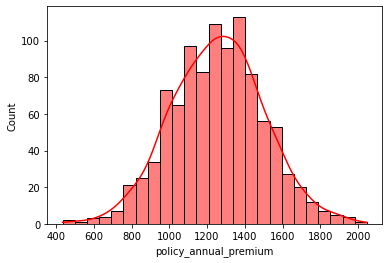

In [75]:
sns.histplot(df_visualization_continuous['policy_annual_premium'],kde=True,color='red')

<AxesSubplot:xlabel='policy_annual_premium', ylabel='count'>

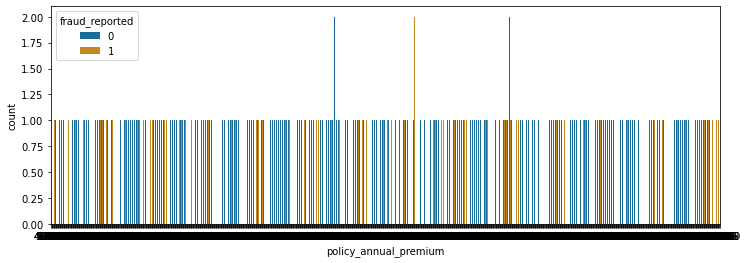

In [76]:
plt.subplots(figsize=(12,4))
sns.countplot(x="policy_annual_premium", hue="fraud_reported", data=df, palette="colorblind")

<AxesSubplot:xlabel='umbrella_limit', ylabel='Density'>

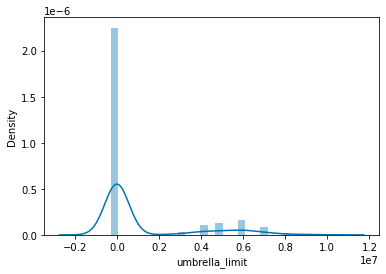

In [77]:
sns.distplot(df_visualization_continuous['umbrella_limit'],kde=True)

<AxesSubplot:xlabel='umbrella_limit', ylabel='Count'>

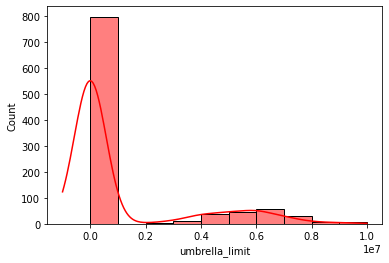

In [78]:
sns.histplot(df_visualization_continuous['umbrella_limit'],kde=True,color='red')

<AxesSubplot:xlabel='umbrella_limit', ylabel='count'>

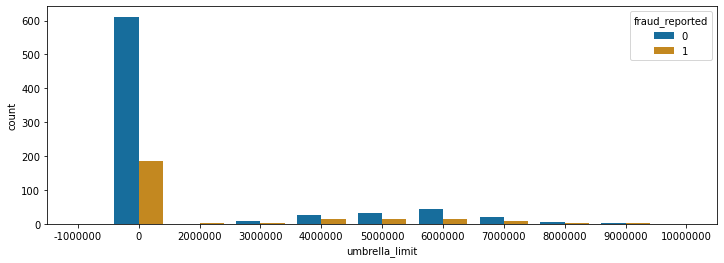

In [79]:
plt.subplots(figsize=(12,4))
sns.countplot(x="umbrella_limit", hue="fraud_reported", data=df, palette="colorblind")

We see that most fall in 0 and a very few are having limit so the data is right skewed

<AxesSubplot:xlabel='capital-gains', ylabel='Density'>

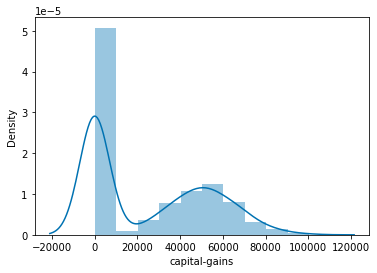

In [80]:
sns.distplot(df_visualization_continuous['capital-gains'],kde=True)

<AxesSubplot:xlabel='capital-gains', ylabel='Count'>

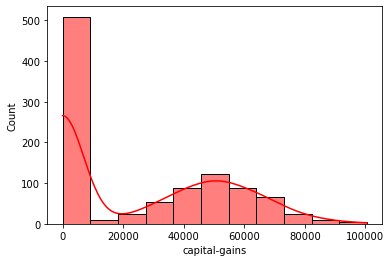

In [81]:
sns.histplot(df_visualization_continuous['capital-gains'],kde=True,color='r')

<AxesSubplot:xlabel='capital-gains', ylabel='count'>

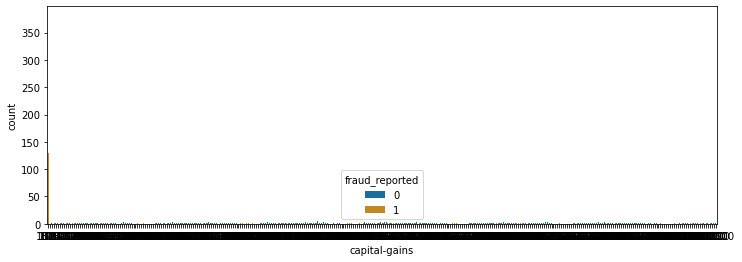

In [82]:
plt.subplots(figsize=(12,4))
sns.countplot(x="capital-gains", hue="fraud_reported", data=df, palette="colorblind")

As the higest range is 0 to 1000 we see the most fraud in that as well

<AxesSubplot:xlabel='capital-loss', ylabel='Density'>

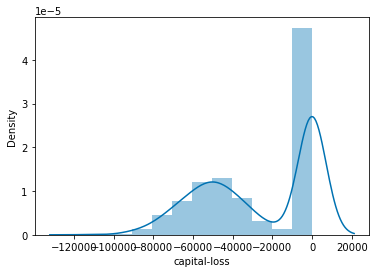

In [83]:
sns.distplot(df_visualization_continuous['capital-loss'],kde=True)

<AxesSubplot:xlabel='capital-loss', ylabel='Count'>

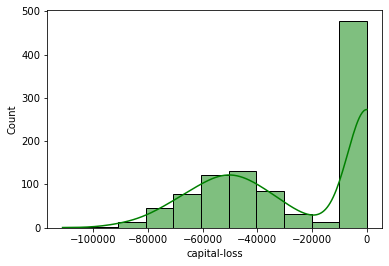

In [84]:
sns.histplot(df_visualization_continuous['capital-loss'],kde=True,color='green')

Just like capital gains we see an inverse relationship as this is capital losses , most frauds seen in 0 -1000

<AxesSubplot:xlabel='incident_hour_of_the_day', ylabel='Density'>

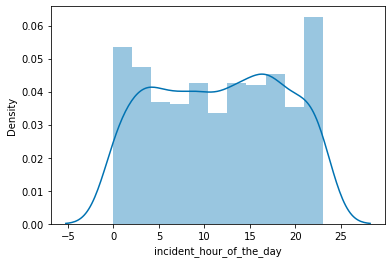

In [85]:
sns.distplot(df_visualization_continuous['incident_hour_of_the_day'],kde=True)

<AxesSubplot:xlabel='incident_hour_of_the_day', ylabel='Count'>

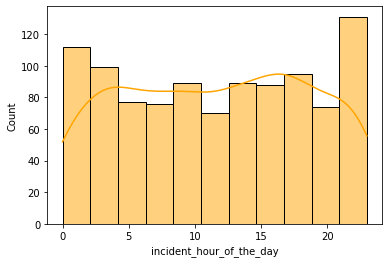

In [86]:
sns.histplot(df_visualization_continuous['incident_hour_of_the_day'],kde=True,color='orange')

17    54
3     53
0     52
23    51
16    49
13    46
10    46
4     46
6     44
9     43
14    43
21    42
18    41
12    40
19    40
7     40
15    39
22    38
8     36
20    34
5     33
2     31
11    30
1     29
Name: incident_hour_of_the_day, dtype: int64


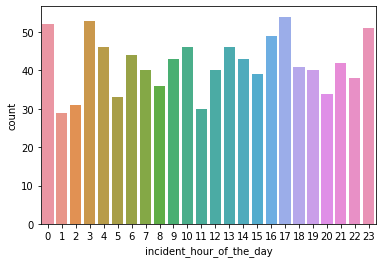

In [87]:
#Lets see the representation individually now with each column 

ax = sns.countplot(x='incident_hour_of_the_day',data = df_visualization_continuous)
print(df_visualization_continuous['incident_hour_of_the_day'].value_counts())

We see a fewer no of variations and we see 17 is highest while 1 is lowest signifying the incident happens in late noon

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='Density'>

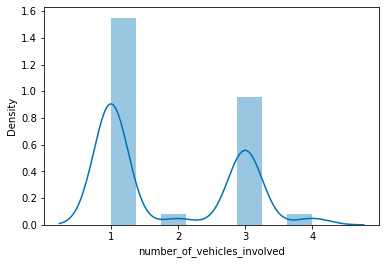

In [88]:
sns.distplot(df_visualization_continuous['number_of_vehicles_involved'],kde=True)

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='Count'>

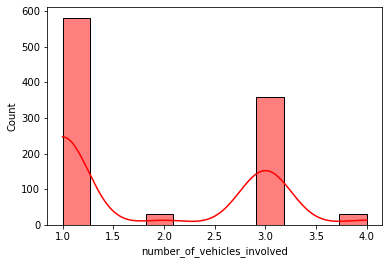

In [89]:
sns.histplot(df_visualization_continuous['number_of_vehicles_involved'],kde=True,color='r')

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='count'>

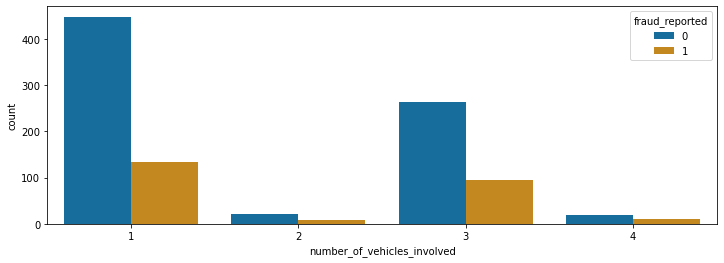

In [90]:
plt.subplots(figsize=(12,4))
sns.countplot(x="number_of_vehicles_involved", hue="fraud_reported", data=df, palette="colorblind")

We see that 1 is the higest fraud reported but 3 as per ratio of non-fraud is the highest

<AxesSubplot:xlabel='bodily_injuries', ylabel='Density'>

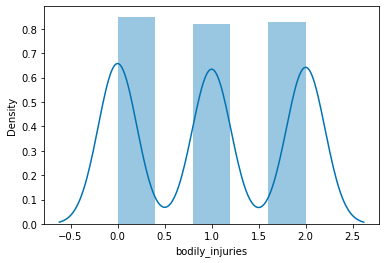

In [91]:
sns.distplot(df_visualization_continuous['bodily_injuries'],kde=True)

<AxesSubplot:xlabel='bodily_injuries', ylabel='Count'>

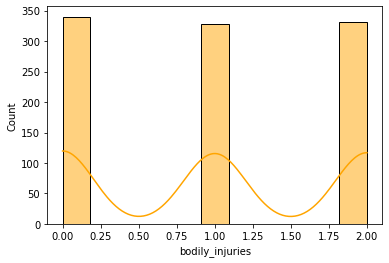

In [92]:
sns.histplot(df_visualization_continuous['bodily_injuries'],kde=True,color='orange')

We see that the fraud claim are equal spread across the 3 as well

<AxesSubplot:xlabel='witnesses', ylabel='Density'>

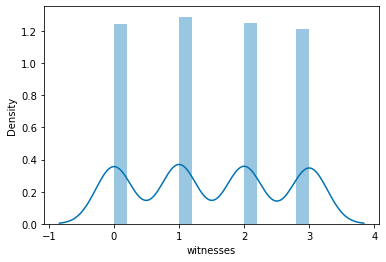

In [93]:
sns.distplot(df_visualization_continuous['witnesses'],kde=True)

<AxesSubplot:xlabel='witnesses', ylabel='Count'>

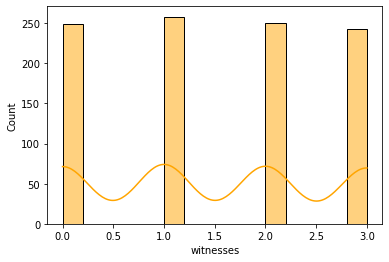

In [94]:
sns.histplot(df_visualization_continuous['witnesses'],kde=True,color='orange')

<AxesSubplot:xlabel='witnesses', ylabel='count'>

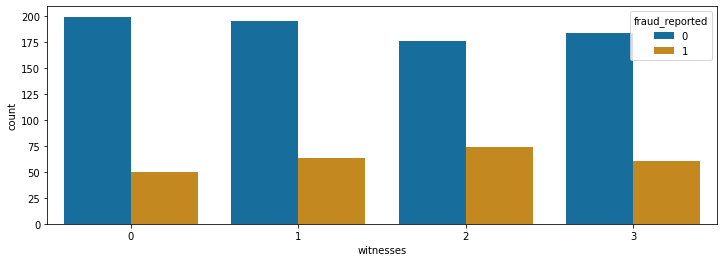

In [95]:
plt.subplots(figsize=(12,4))
sns.countplot(x="witnesses", hue="fraud_reported", data=df, palette="colorblind")

We see a slight increase in fraud in 2 category but overall we see even spread

<AxesSubplot:xlabel='total_claim_amount', ylabel='Density'>

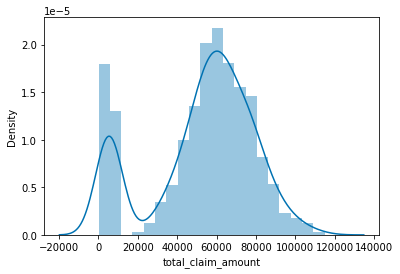

In [96]:
sns.distplot(df_visualization_continuous['total_claim_amount'],kde=True)

<AxesSubplot:xlabel='total_claim_amount', ylabel='Count'>

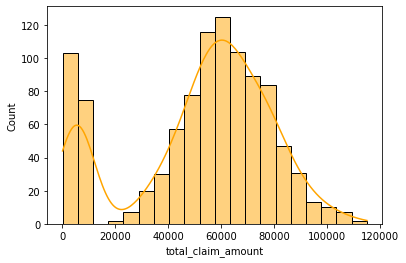

In [97]:
sns.histplot(df_visualization_continuous['total_claim_amount'],kde=True,color='orange')

In [98]:
import plotly.express as px
plot_df=df.sort_values(by="fraud_reported")
fig=px.histogram(plot_df, x='total_claim_amount', color='fraud_reported', 
                 opacity=0.8, histnorm='density', barmode='overlay', marginal='box',
                 color_discrete_map={'Yes': '#B9C0C9','No': '#CDBBA7'})
fig.update_layout(title_text='Distribution of total_claim_amount by fraud_reported Status',
                  xaxis_title='total_claim_amount, $', yaxis_title='Density',font_color='#28221D',
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0', legend_traceorder='reversed')
fig.show()

We see a huge spike of frauds between 50 and 70k and at 100 all are fraud claims

<AxesSubplot:xlabel='injury_claim', ylabel='Density'>

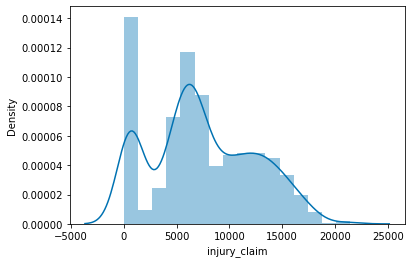

In [99]:
sns.distplot(df_visualization_continuous['injury_claim'],kde=True)

<AxesSubplot:xlabel='injury_claim', ylabel='Count'>

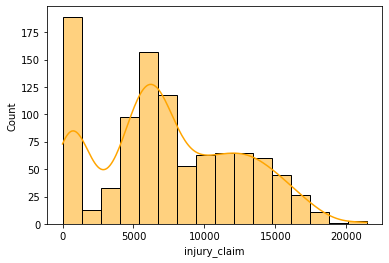

In [100]:
sns.histplot(df_visualization_continuous['injury_claim'],kde=True,color='orange')

We see spike in fraud between 5k and 8k here and even spread in other ranges

<AxesSubplot:xlabel='property_claim', ylabel='Density'>

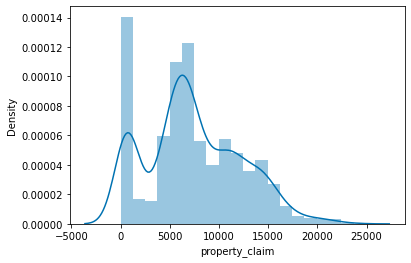

In [101]:
sns.distplot(df_visualization_continuous['property_claim'],kde=True)

<AxesSubplot:xlabel='property_claim', ylabel='Count'>

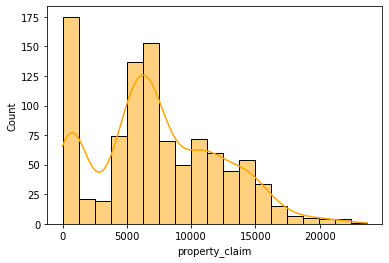

In [102]:
sns.histplot(df_visualization_continuous['property_claim'],kde=True,color='orange')

We see the same trend as the previous 2 columns, the higher rang in 0 to 1000 is causing the data to be skewed to right

<AxesSubplot:xlabel='vehicle_claim', ylabel='Density'>

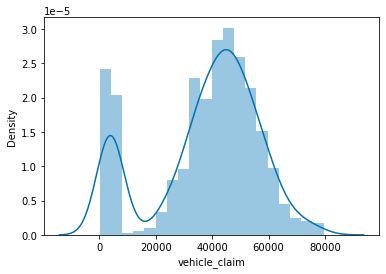

In [103]:
sns.distplot(df_visualization_continuous['vehicle_claim'],kde=True)

<AxesSubplot:xlabel='vehicle_claim', ylabel='Count'>

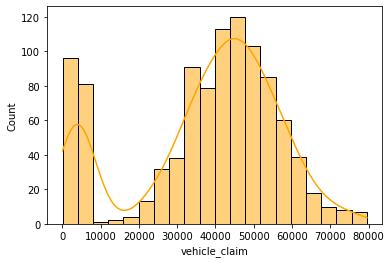

In [104]:
sns.histplot(df_visualization_continuous['vehicle_claim'],kde=True,color='orange')

The same trend here as well where there ia a significant number between 0 to 5000 and 40000 to 55000, We see a spike in fraud between 40 to 55k here.

<AxesSubplot:xlabel='auto_year', ylabel='Density'>

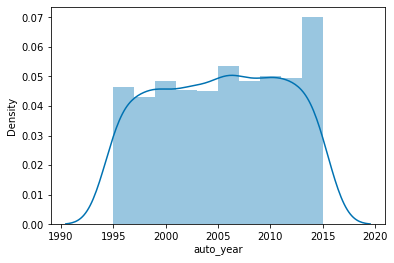

In [105]:
sns.distplot(df_visualization_continuous['auto_year'],kde=True)

<AxesSubplot:xlabel='auto_year', ylabel='Count'>

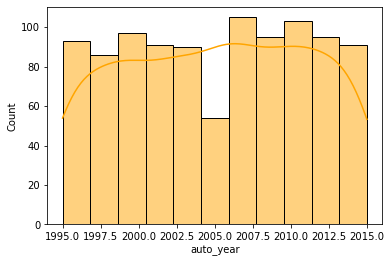

In [106]:
sns.histplot(df_visualization_continuous['auto_year'],kde=True,color='orange')

We see a equal distribution of data except in 2005, We see an even spread in all column , as per ration 2005 has the highest fraud with non-fraud

In [107]:
#sns.pairplot(df)

Number of observation in the pairplot some show similarity , but the relationship is very hard to pinpoint so we will need to plot different relationship plots to find the actual relationship between the columns individually

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


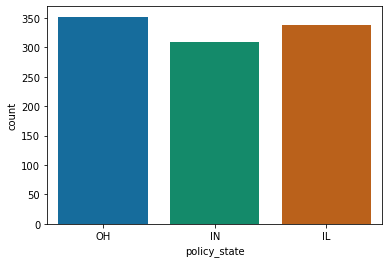

In [108]:
# Visualization of the categorical features

#Lets see the representation individually now with each column 

ax = sns.countplot(x='policy_state',data = df)
print(df['policy_state'].value_counts())

<AxesSubplot:xlabel='policy_state', ylabel='count'>

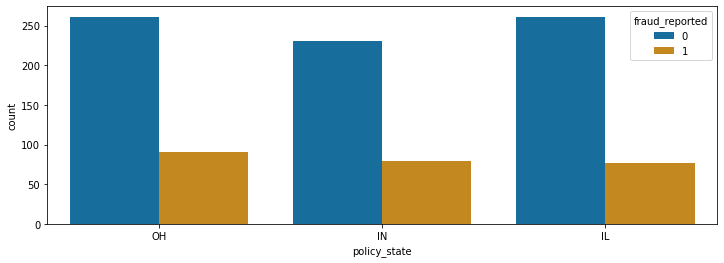

In [109]:
plt.subplots(figsize=(12,4))
sns.countplot(x="policy_state", hue="fraud_reported", data=df, palette="colorblind")

We see all the categories are equal

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64


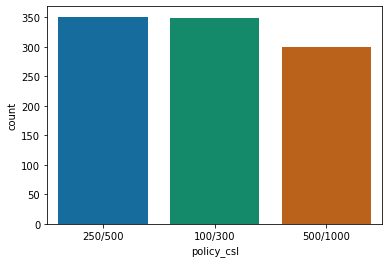

In [110]:
ax = sns.countplot(x='policy_csl',data = df)
print(df['policy_csl'].value_counts())

<AxesSubplot:xlabel='policy_csl', ylabel='count'>

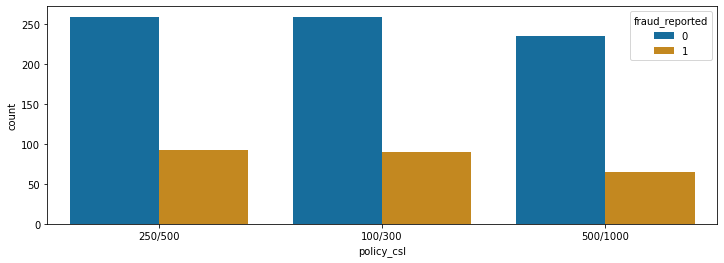

In [111]:
plt.subplots(figsize=(12,4))
sns.countplot(x="policy_csl", hue="fraud_reported", data=df, palette="colorblind")

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


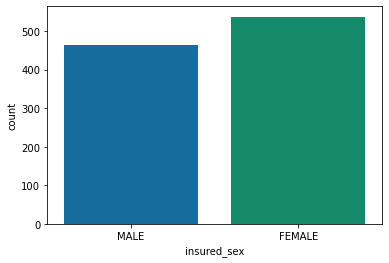

In [112]:
ax = sns.countplot(x='insured_sex',data = df)
print(df['insured_sex'].value_counts())

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

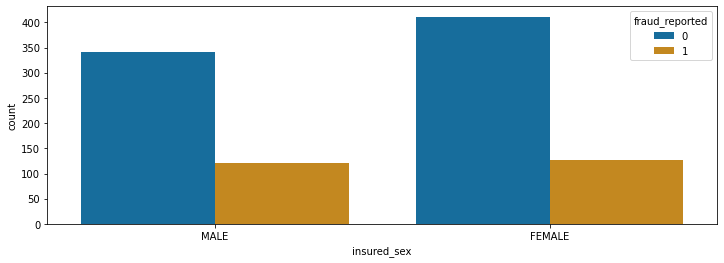

In [113]:
plt.subplots(figsize=(12,4))
sns.countplot(x="insured_sex", hue="fraud_reported", data=df, palette="colorblind")

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


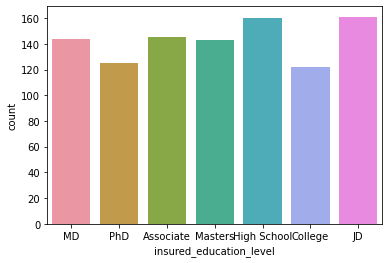

In [114]:
#Lets see the representation individually now with each column 

ax = sns.countplot(x='insured_education_level',data = df)
print(df['insured_education_level'].value_counts())

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

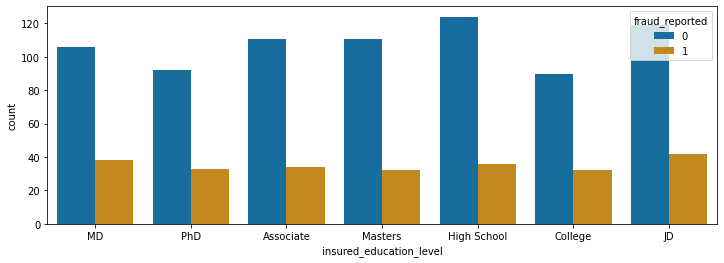

In [115]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,4))
sns.countplot(x="insured_education_level", hue="fraud_reported", data=df, palette="colorblind")

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


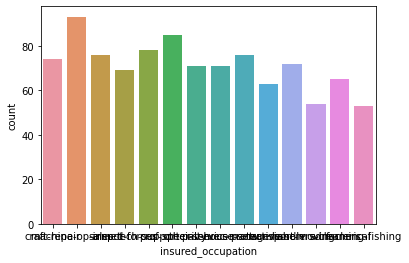

In [116]:
ax = sns.countplot(x='insured_occupation',data = df)
print(df['insured_occupation'].value_counts())

<AxesSubplot:xlabel='insured_occupation', ylabel='count'>

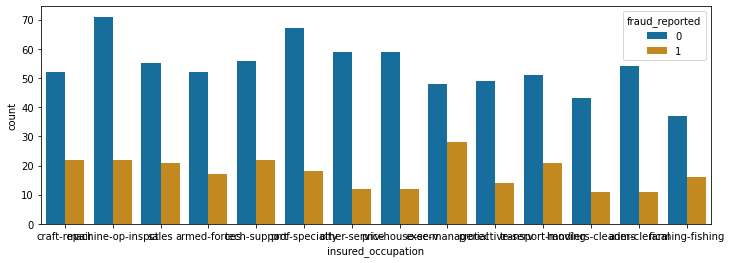

In [117]:
plt.subplots(figsize=(12,4))
sns.countplot(x="insured_occupation", hue="fraud_reported", data=df, palette="colorblind")

02-02-2015    28
17-02-2015    26
07-01-2015    25
10-01-2015    24
04-02-2015    24
24-01-2015    24
19-01-2015    23
08-01-2015    22
13-01-2015    21
30-01-2015    21
12-02-2015    20
22-02-2015    20
31-01-2015    20
06-02-2015    20
21-02-2015    19
01-01-2015    19
23-02-2015    19
12-01-2015    19
14-01-2015    19
21-01-2015    19
03-01-2015    18
14-02-2015    18
01-02-2015    18
28-02-2015    18
20-01-2015    18
18-01-2015    18
25-02-2015    18
06-01-2015    17
09-01-2015    17
08-02-2015    17
24-02-2015    17
26-02-2015    17
13-02-2015    16
15-02-2015    16
16-02-2015    16
05-02-2015    16
16-01-2015    16
17-01-2015    15
18-02-2015    15
28-01-2015    15
15-01-2015    15
22-01-2015    14
20-02-2015    14
27-02-2015    14
23-01-2015    13
03-02-2015    13
27-01-2015    13
09-02-2015    13
04-01-2015    12
01-03-2015    12
26-01-2015    11
29-01-2015    11
02-01-2015    11
19-02-2015    10
11-02-2015    10
10-02-2015    10
07-02-2015    10
25-01-2015    10
11-01-2015    

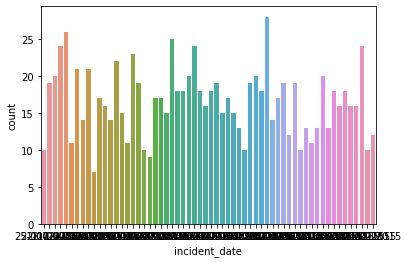

In [118]:
#Lets see the representation individually now with each column 

ax = sns.countplot(x='incident_date',data = df)
print(df['incident_date'].value_counts())

<AxesSubplot:xlabel='incident_date', ylabel='count'>

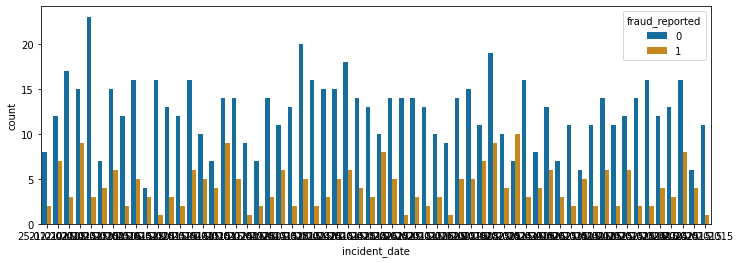

In [119]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,4))
sns.countplot(x="incident_date", hue="fraud_reported", data=df, palette="colorblind")

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


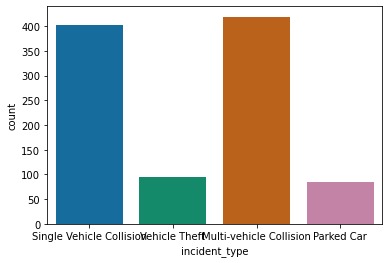

In [120]:
ax = sns.countplot(x='incident_type',data = df)
print(df['incident_type'].value_counts())

<AxesSubplot:xlabel='incident_type', ylabel='count'>

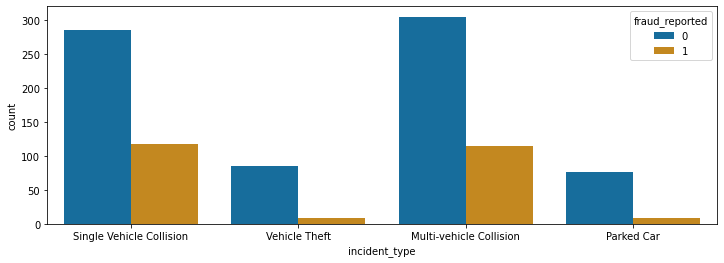

In [121]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,4))
sns.countplot(x="incident_type", hue="fraud_reported", data=df, palette="colorblind")

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64


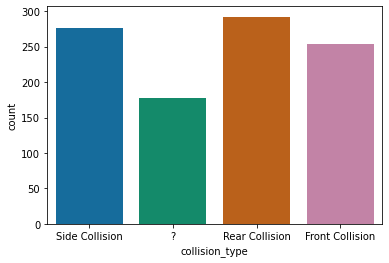

In [122]:
ax = sns.countplot(x='collision_type',data = df)
print(df['collision_type'].value_counts())

<AxesSubplot:xlabel='collision_type', ylabel='count'>

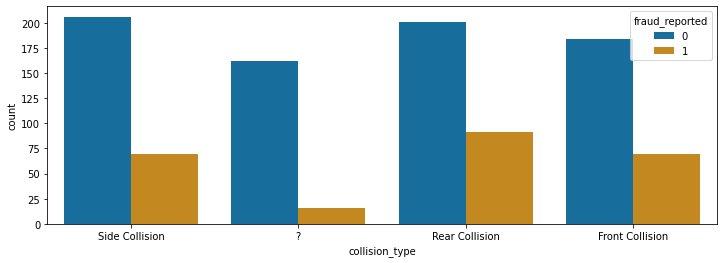

In [123]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,4))
sns.countplot(x="collision_type", hue="fraud_reported", data=df, palette="colorblind")

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64


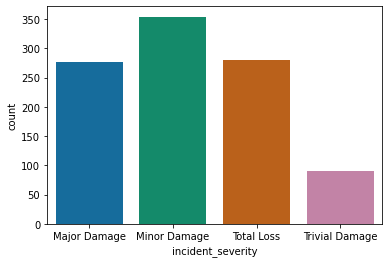

In [124]:
#Lets see the representation individually now with each column 

ax = sns.countplot(x='incident_severity',data = df)
print(df['incident_severity'].value_counts())

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

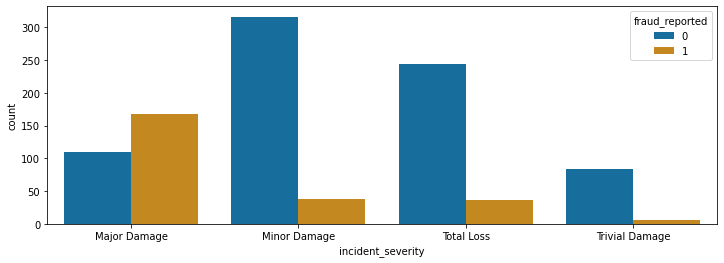

In [125]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,4))
sns.countplot(x="incident_severity", hue="fraud_reported", data=df, palette="colorblind")

We see a huge huge spike of frauds in category 0 which is Major Damage

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64


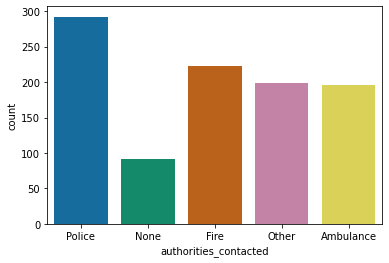

In [126]:
ax = sns.countplot(x='authorities_contacted',data = df)
print(df['authorities_contacted'].value_counts())

<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

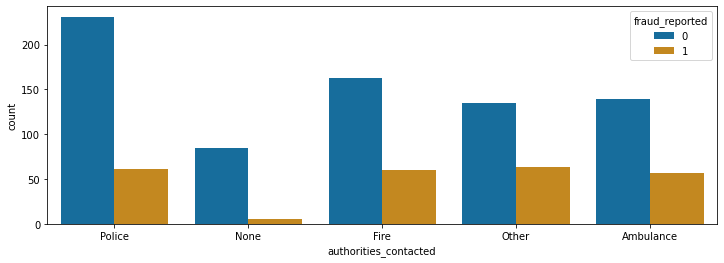

In [127]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,4))
sns.countplot(x="authorities_contacted", hue="fraud_reported", data=df, palette="colorblind")

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64


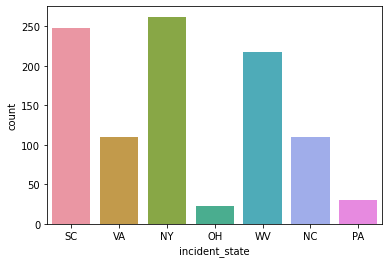

In [128]:
#Lets see the representation individually now with each column 

ax = sns.countplot(x='incident_state',data = df)
print(df['incident_state'].value_counts())

<AxesSubplot:xlabel='incident_state', ylabel='count'>

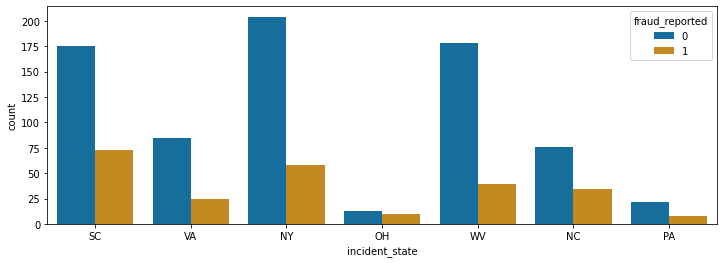

In [129]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,4))
sns.countplot(x="incident_state", hue="fraud_reported", data=df, palette="colorblind")

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64


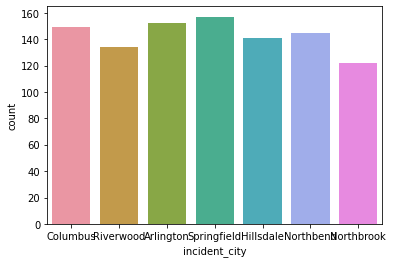

In [130]:
#Lets see the representation individually now with each column 

ax = sns.countplot(x='incident_city',data = df)
print(df['incident_city'].value_counts())

<AxesSubplot:xlabel='incident_city', ylabel='count'>

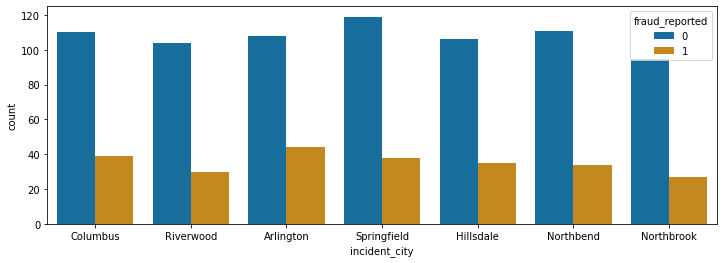

In [131]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,4))
sns.countplot(x="incident_city", hue="fraud_reported", data=df, palette="colorblind")

?      360
NO     338
YES    302
Name: property_damage, dtype: int64


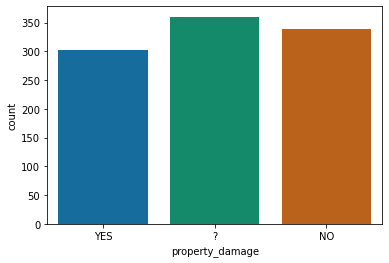

In [132]:
#Lets see the representation individually now with each column 

ax = sns.countplot(x='property_damage',data = df)
print(df['property_damage'].value_counts())

<AxesSubplot:xlabel='property_damage', ylabel='count'>

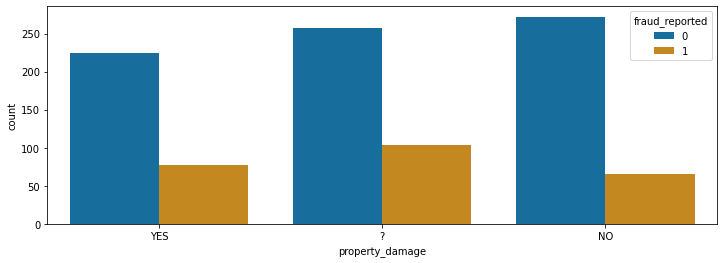

In [133]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,4))
sns.countplot(x="property_damage", hue="fraud_reported", data=df, palette="colorblind")

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64


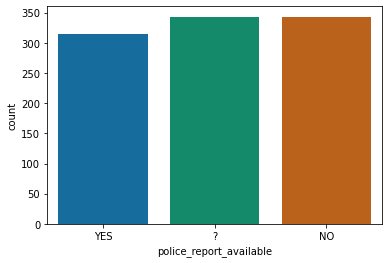

In [134]:
#Lets see the representation individually now with each column 

ax = sns.countplot(x='police_report_available',data = df)
print(df['police_report_available'].value_counts())

<AxesSubplot:xlabel='police_report_available', ylabel='count'>

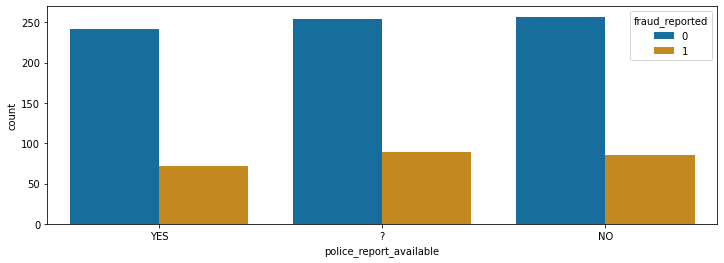

In [135]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,4))
sns.countplot(x="police_report_available", hue="fraud_reported", data=df, palette="colorblind")

Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64


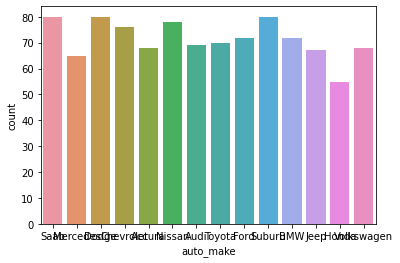

In [136]:
#Lets see the representation individually now with each column 

ax = sns.countplot(x='auto_make',data = df)
print(df['auto_make'].value_counts())

<AxesSubplot:xlabel='auto_make', ylabel='count'>

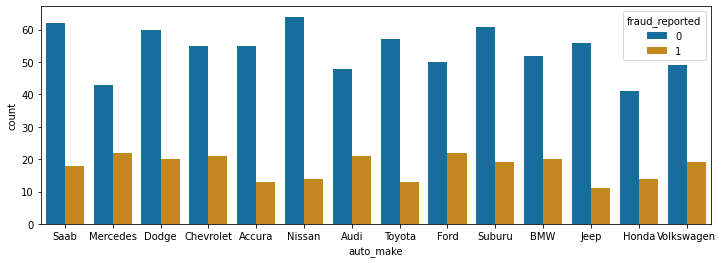

In [137]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,4))
sns.countplot(x="auto_make", hue="fraud_reported", data=df, palette="colorblind")

RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
92x               28
Camry             28
Forrestor         28
F150              27
95                27
E400              27
93                25
Grand Cherokee    25
Escape            24
Tahoe             24
Maxima            24
Ultima            23
X5                23
Highlander        22
Civic             22
Silverado         22
Fusion            21
ML350             20
Impreza           20
Corolla           20
TL                20
CRV               20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64


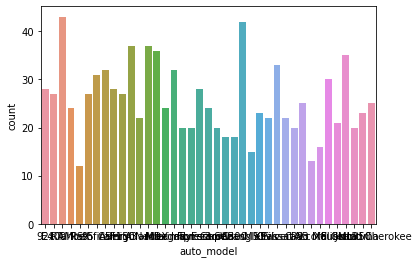

In [138]:
#Lets see the representation individually now with each column 

ax = sns.countplot(x='auto_model',data = df)
print(df['auto_model'].value_counts())

<AxesSubplot:xlabel='auto_model', ylabel='count'>

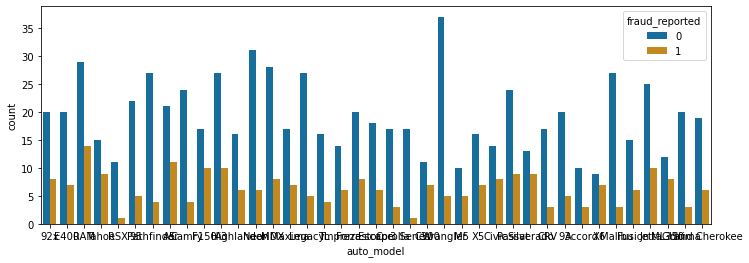

In [139]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,4))
sns.countplot(x="auto_model", hue="fraud_reported", data=df, palette="colorblind")

We see that some columns like incident severity shows spike in fraud in major damage but overall we see a almost equal distribution of fraud cses in all the categories

### Encoding the categorical Features to numerical features

In [140]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [141]:
for i in df.columns:
    if df[i].dtypes == "object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))


In [142]:
df.dtypes #Lets check the column type

months_as_customer               int64
age                              int64
policy_state                     int32
policy_csl                       int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_date                    int32
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                  int32
bodily_injuries                  int64
witnesses                        int64
police_report_available  

We have converted the categorical data to numerical data we can move ahead to the next step

### Visualizing the relationship between the features and the target variable - Attrition

In [143]:
#Divide data into features and label

x = df.drop(columns = ['fraud_reported'])
y = df['fraud_reported']

In [144]:
x

months_as_customer  age  policy_state  policy_csl  policy_deductable  \
0                   328   48             2           1               1000   
1                   228   42             1           1               2000   
2                   134   29             2           0               2000   
3                   256   41             0           1               2000   
4                   228   44             0           2               1000   
..                  ...  ...           ...         ...                ...   
995                   3   38             2           2               1000   
996                 285   41             0           0               1000   
997                 130   34             2           1                500   
998                 458   62             0           2               2000   
999                 456   60             2           1               1000   

     policy_annual_premium  umbrella_limit  insured_sex  \
0                  1406.91               0            1   
1                  1197.22         5000000            1   
2                  1413.14         5000000            0   
3                  1415.74         6000000            0   
4                  1583.91         6000000            1   
..                     ...             ...          ...   
995                1310.80               0            0   
996                1436.79               0            0   
997                1383.49         3000000            0   
998                1356.92         5000000            1   
999                 766.19               0            0   

     insured_education_level  insured_occupation  ...  bodily_injuries  \
0                          4                   2  ...                1   
1                          4                   6  ...                0   
2                          6                  11  ...                2   
3                          6                   1  ...                1   
4                          0                  11  ...                0   
..                       ...                 ...  ...              ...   
995                        5                   2  ...                0   
996                        6                   9  ...                2   
997                        5                   1  ...                2   
998                        0                   5  ...                0   
999                        0                  11  ...                0   

     witnesses  police_report_available  total_claim_amount  injury_claim  \
0            2                        2               71610          6510   
1            0                        0                5070           780   
2            3                        1               34650          7700   
3            2                        1               63400          6340   
4            1                        1                6500          1300   
..         ...                      ...                 ...           ...   
995          1                        0               87200         17440   
996          3                        0              108480         18080   
997          3                        2               67500          7500   
998          1                        2               46980          5220   
999          3                        0                5060           460   

     property_claim  vehicle_claim  auto_make  auto_model  auto_year  
0             13020          52080         10           1       2004  
1               780           3510          8          12       2007  
2              3850          23100          4          30       2007  
3              6340          50720          3          34       2014  
4               650           4550          0          31       2009  
..              ...            ...        ...         ...        ...  
995            8720          61040          6           6   

In [145]:
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int32

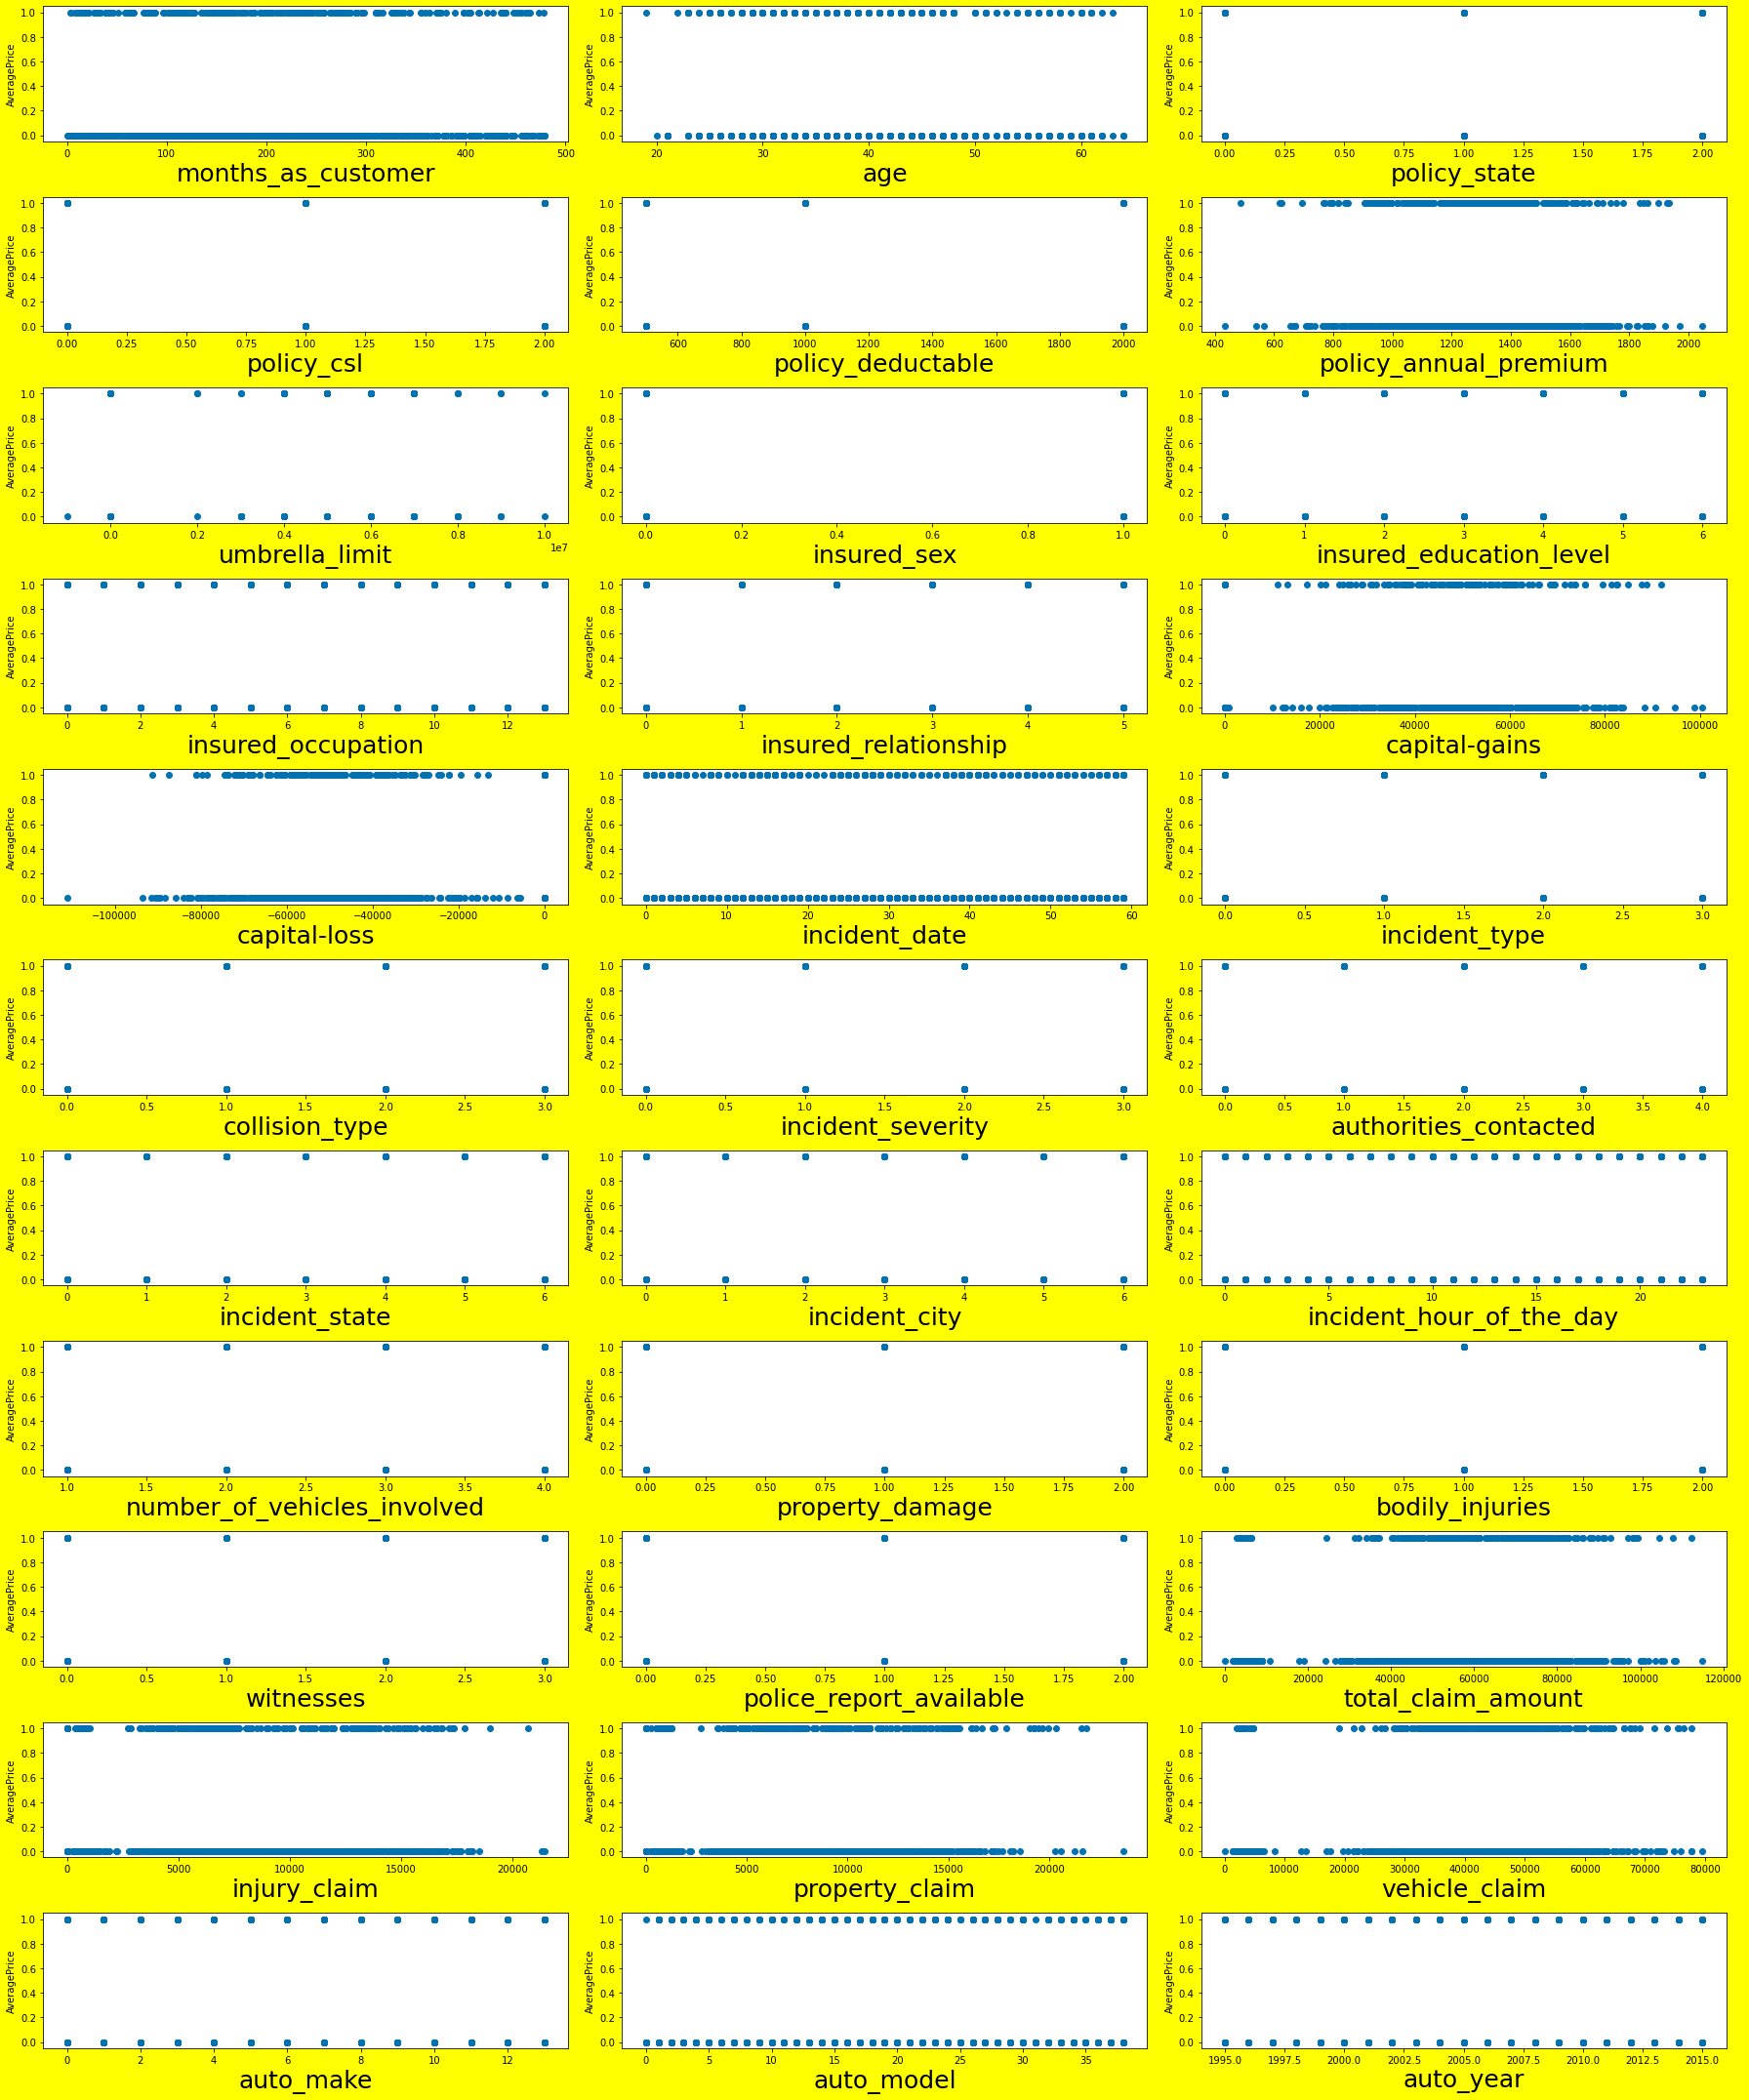

In [146]:
#Lets see how the data is distributed for every column as a whole

#Visualizing Relationship

plt.figure(figsize =(25,30), facecolor = 'yellow')
plotnumber = 1

for column in x:
    if plotnumber <=33:
        ax = plt.subplot(11,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize = 25)
        plt.ylabel('AveragePrice',fontsize = 10)
    plotnumber +=1
plt.tight_layout()


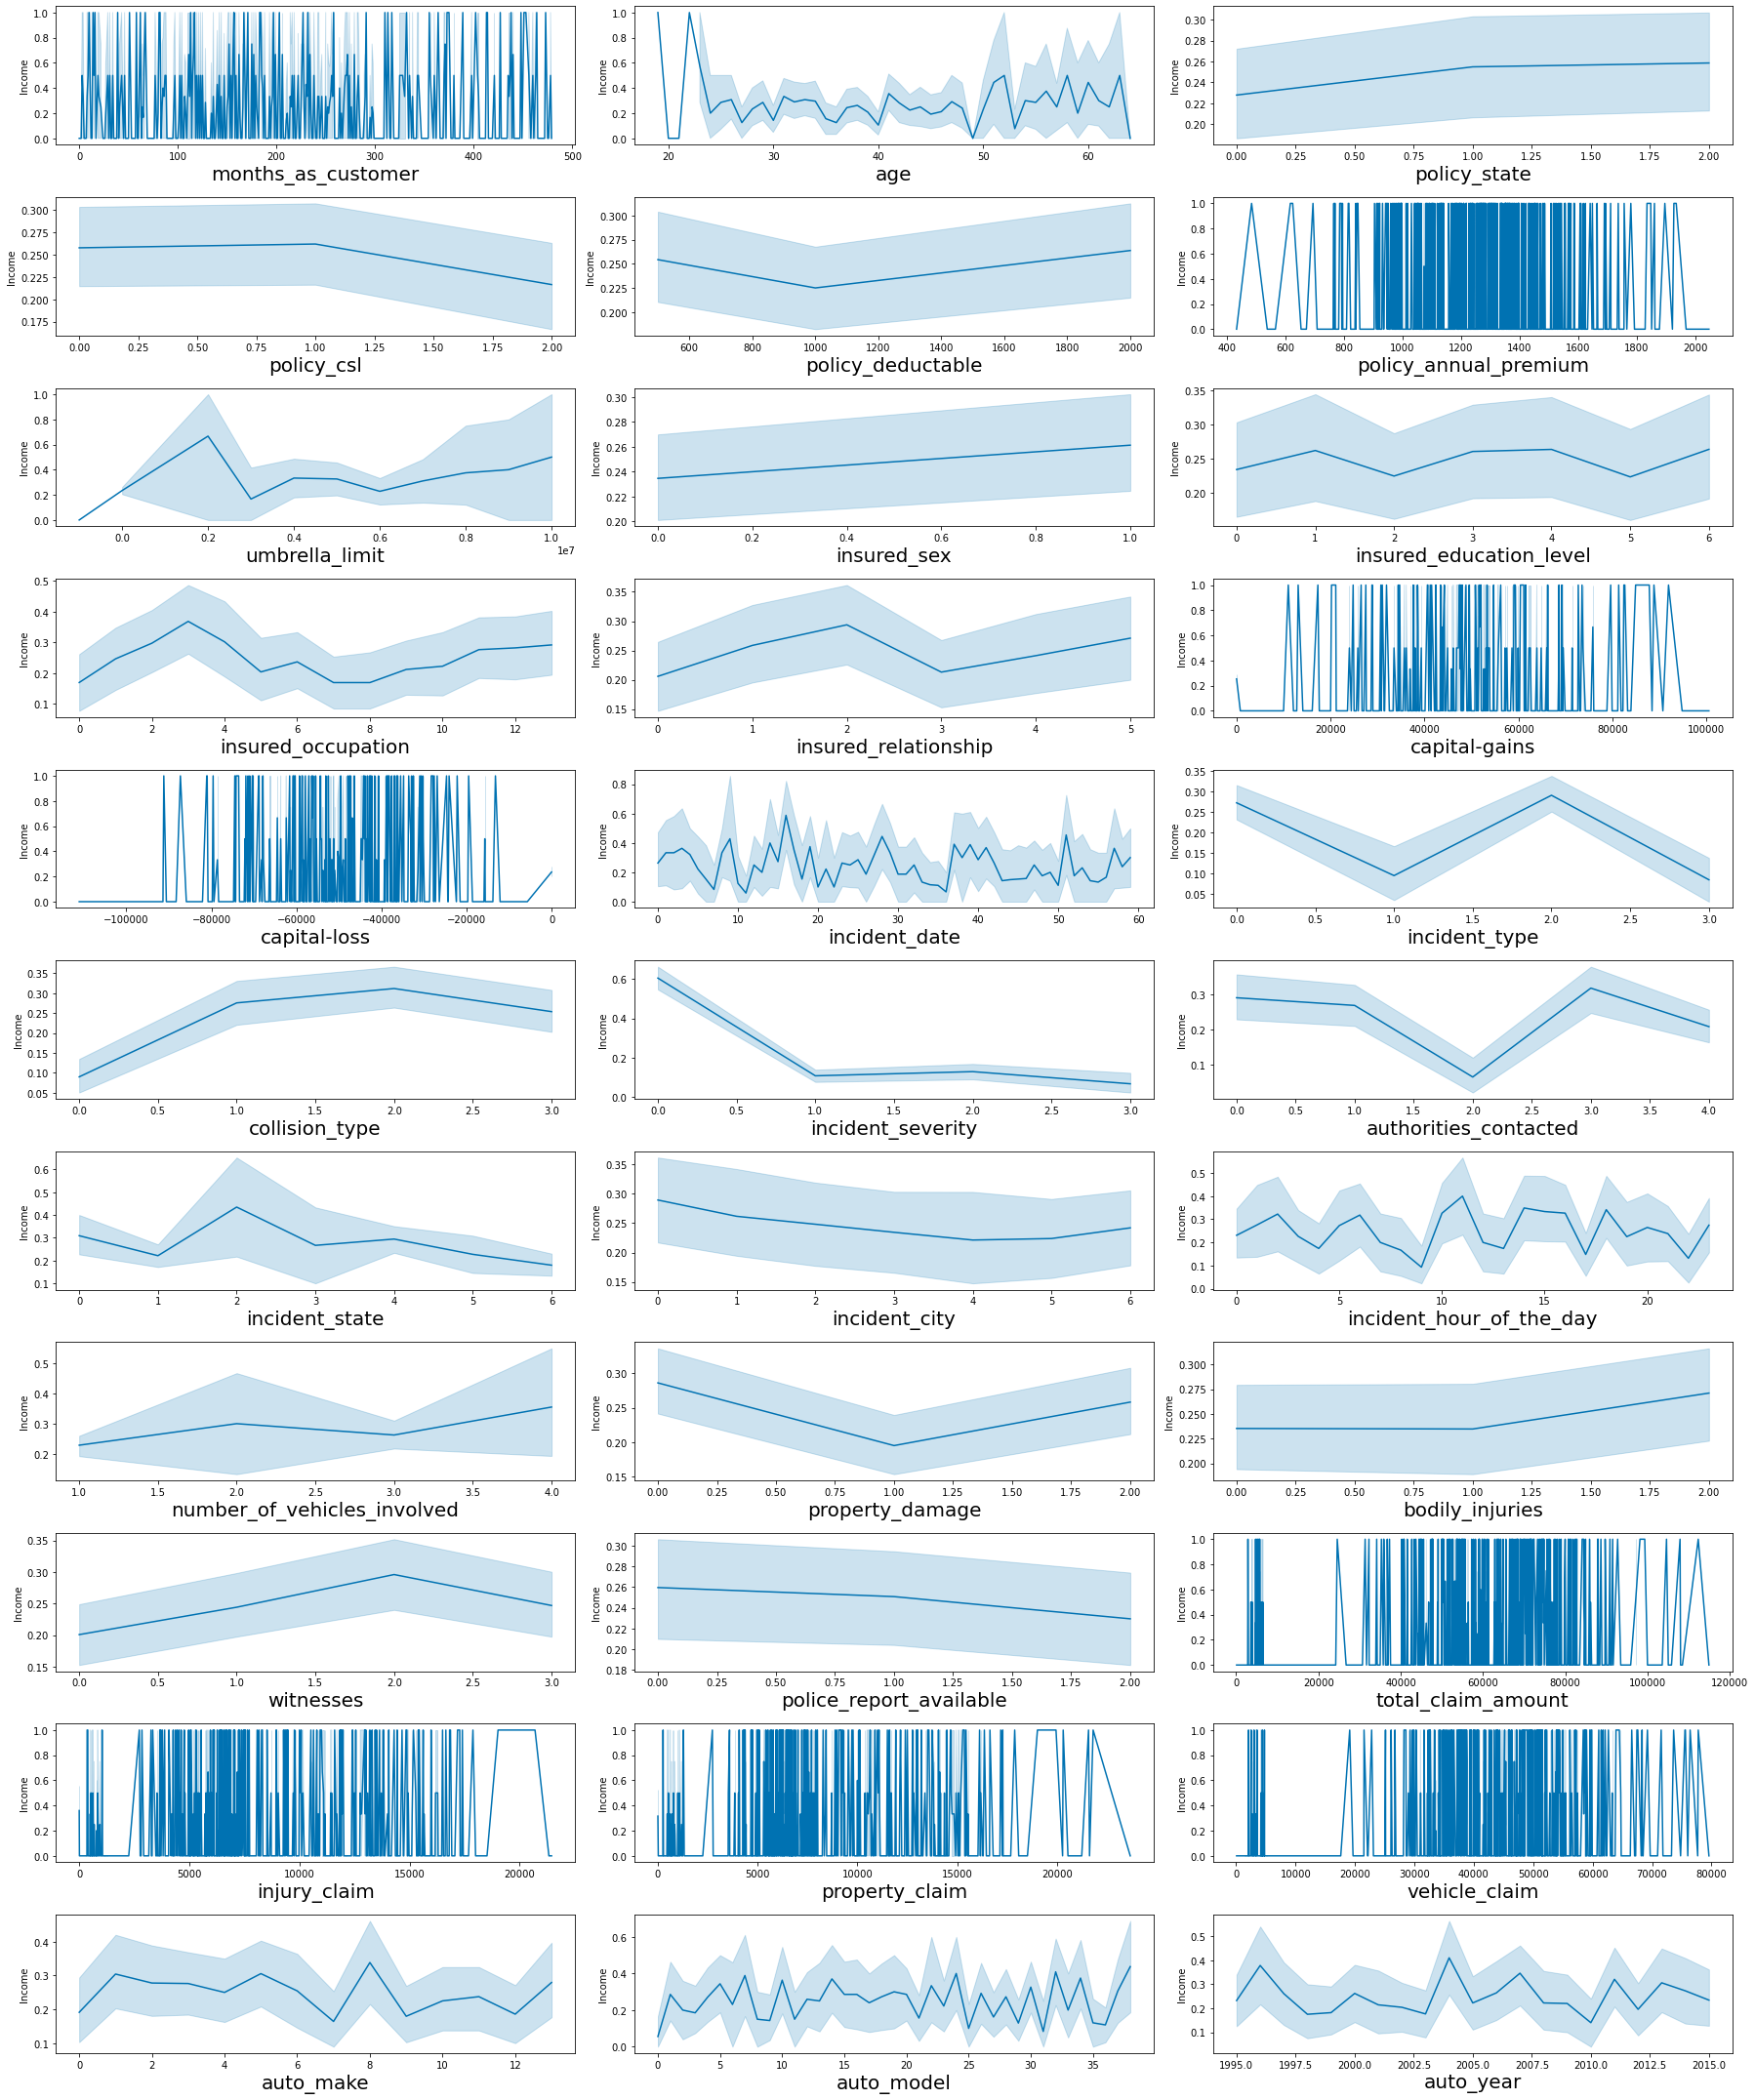

In [147]:
#Lets see how the data is distributed for every column as a whole

#Visualizing Relationship

plt.figure(figsize =(25,30), facecolor = 'white')
plotnumber = 1

for column in x:
    if plotnumber <=33:
        ax = plt.subplot(11,3,plotnumber)
        sns.lineplot(x[column],y)
        plt.xlabel(column,fontsize = 20)
        plt.ylabel('Income',fontsize = 10)
    plotnumber +=1
plt.tight_layout()

There is varied relationships with all the features and the label , We also did see the relationship in bar plot and piechart in previous section which gave us more insight in the relationship , these graphs are not showing the same , but we can see a different perspective here , we see the pattern here.

#### Visualization of the Data Properties

<AxesSubplot:>

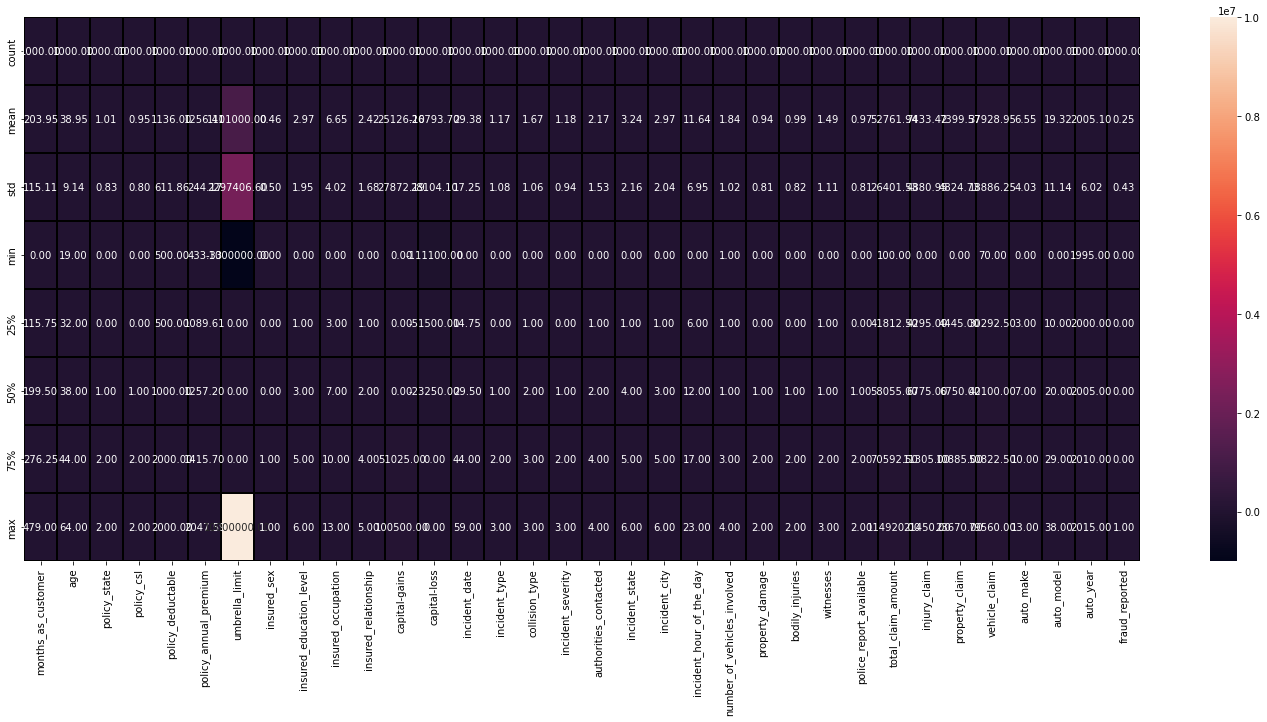

In [148]:
#Lets see how the data is distributed for every column

import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black",fmt='0.2f')

In [149]:
df.skew() #Let's see the skewness of columns

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.106418
bodily_injuries                0.014777
witnesses                      0.019636


#### Observation: 

-  only the categorical columns have more than 0.55 skew so we cannot treat them and we need them as they provide valuable info for the data so we are only treating the continuous columns data

In [150]:
# Correlation of the columns with the target variable -Income

df.corr()['fraud_reported'].sort_values()

incident_severity             -0.405988
incident_state                -0.051407
incident_type                 -0.050376
incident_date                 -0.047726
authorities_contacted         -0.045802
incident_city                 -0.040403
policy_csl                    -0.037190
property_damage               -0.030497
police_report_available       -0.028159
auto_make                     -0.027519
capital-gains                 -0.019173
capital-loss                  -0.014863
policy_annual_premium         -0.014480
auto_model                     0.000720
insured_occupation             0.001564
incident_hour_of_the_day       0.004316
auto_year                      0.007928
insured_education_level        0.008808
age                            0.012143
policy_deductable              0.014817
months_as_customer             0.020544
insured_relationship           0.021043
policy_state                   0.029432
insured_sex                    0.030873
bodily_injuries                0.033877


We see that vehicle_claim has the highest correlation with the target variable having a score of 0.17 which is the highest and total_claim_amount is the 2nd Highest

Overall the rest of the columns show very less correaltion or negative correlation with the target . Same with the highest and the 2nd one as we dont have any feature giving above 15% impact

#### Heatmap of Correlation of the columns within the Columns or Features and Target

<AxesSubplot:>

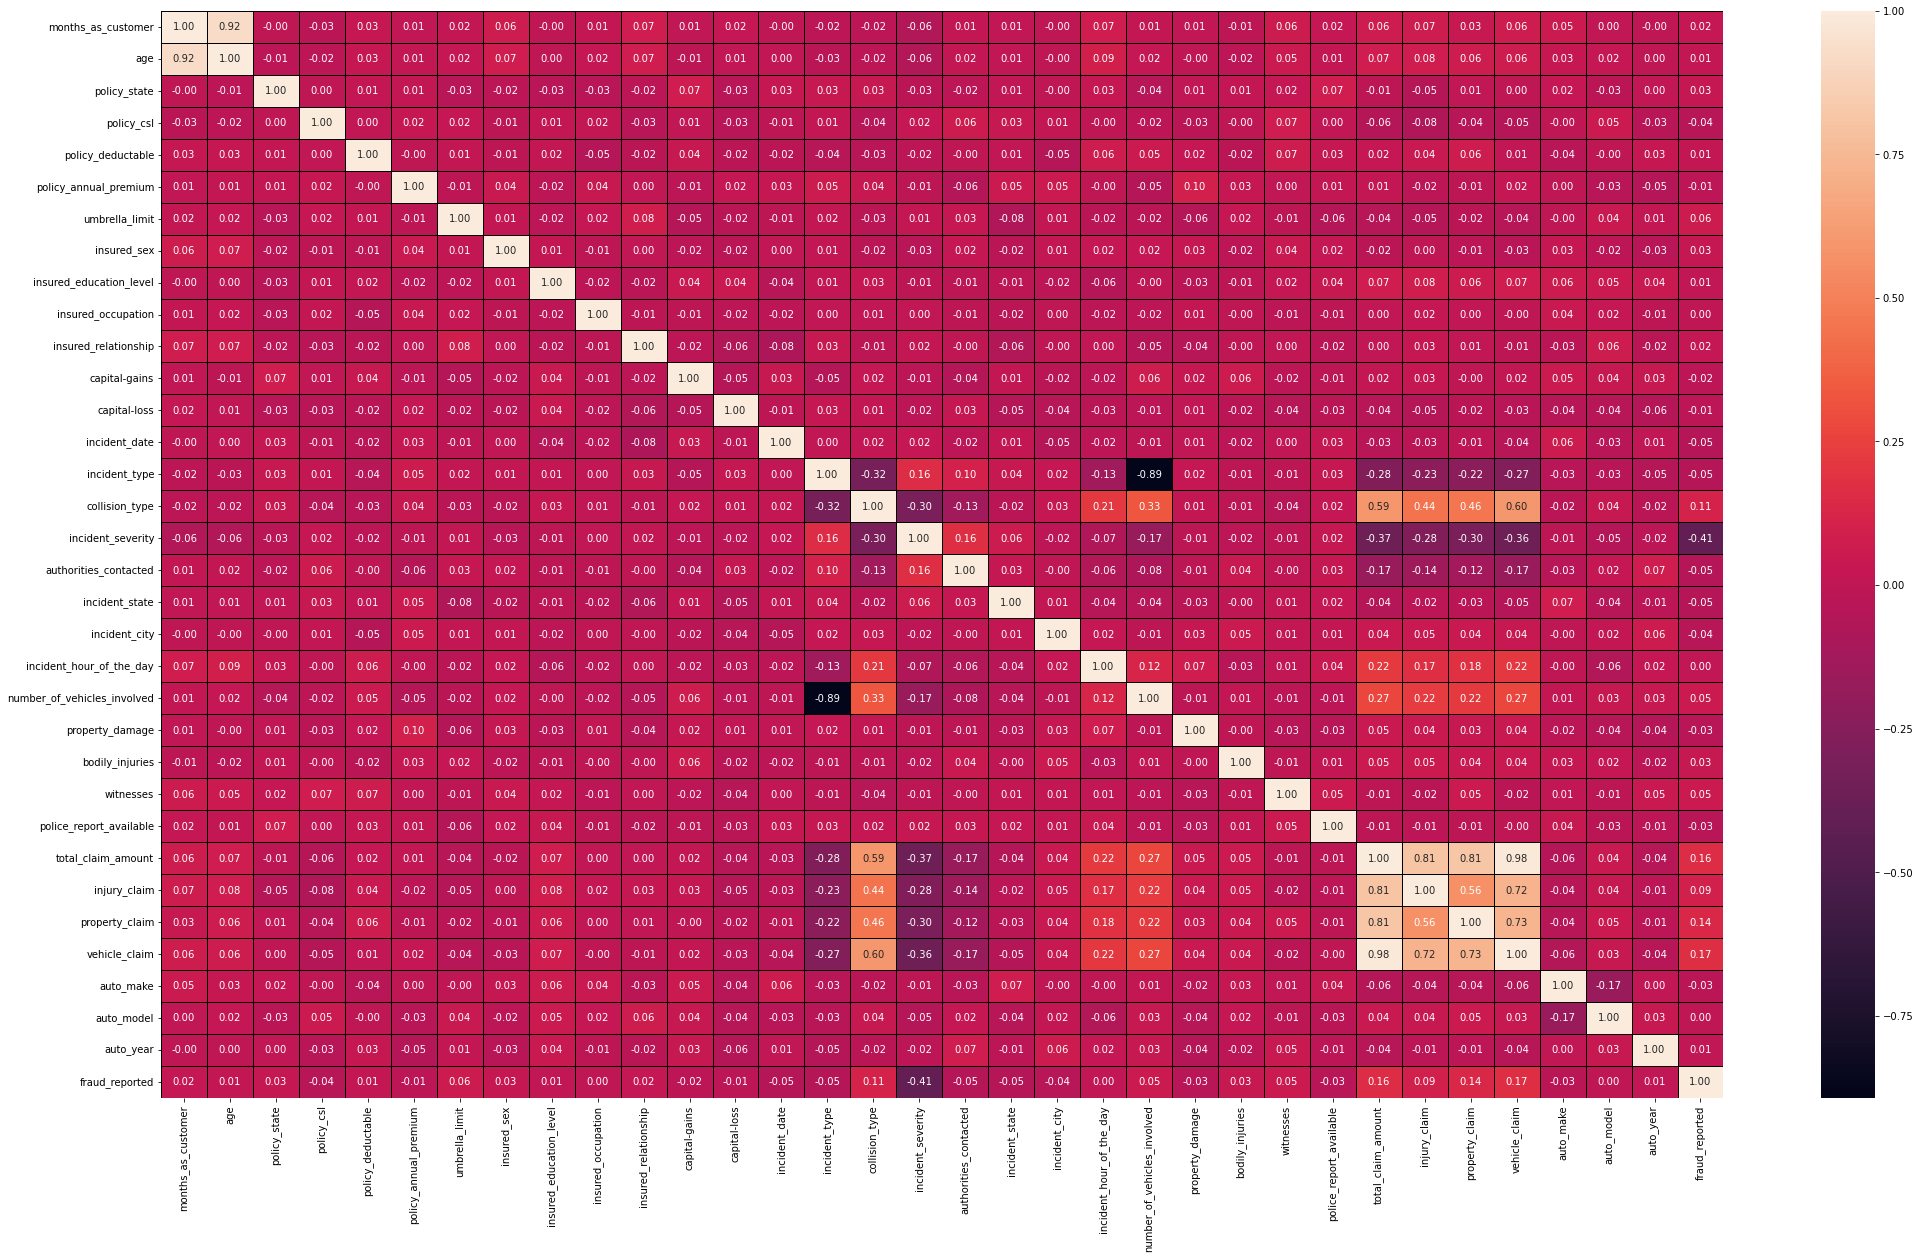

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt
#size of canvas
plt.figure(figsize=(35,20))
sns.heatmap(df.corr(),annot=True, linewidths=0.5,linecolor='black', fmt='.2f')

- some high correlation between'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim' is seen , but apart from that the rest of the features are not having high correaltion and we need not omit any features for the prediction as off now as we will use feature selection to select the features and drop them, there is multicollinearity problem in the data.
    
- collision_type and vehicle_claim is somewhat have 60% relationship as well and the total claim 59%

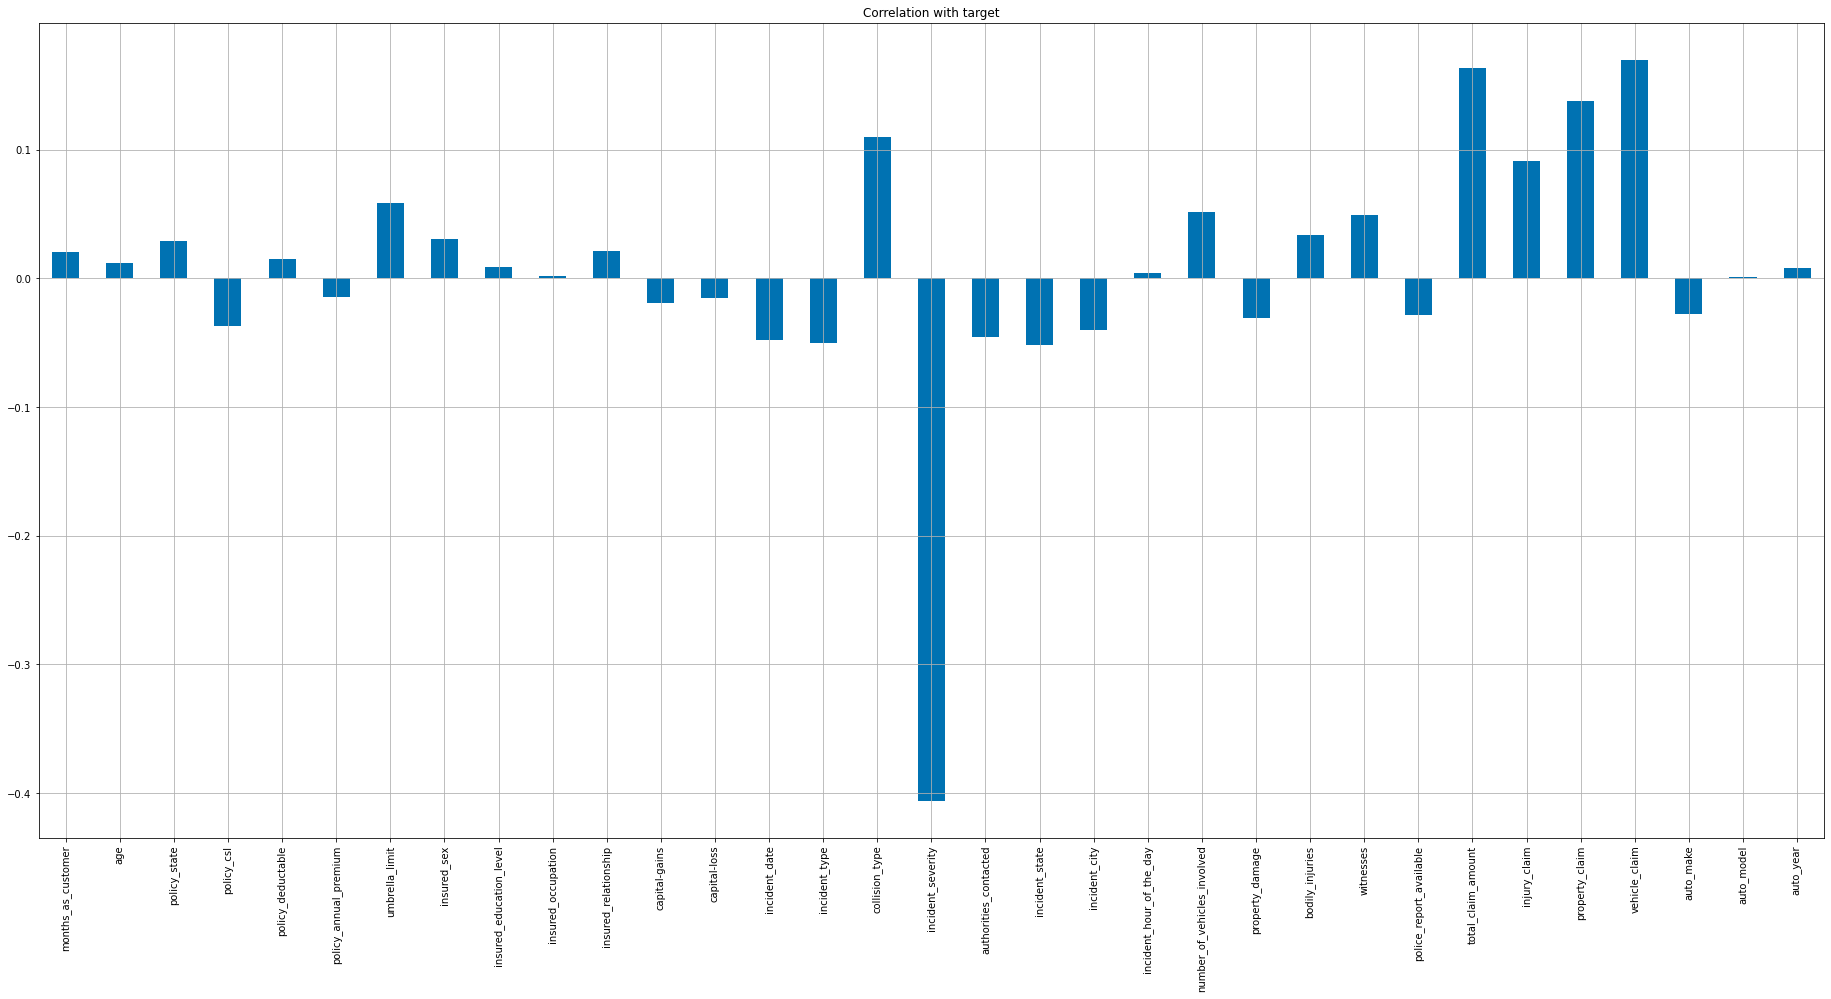

In [152]:
# Plotting a barplot to see th relationship with 1st label in a better way

df.drop('fraud_reported', axis=1).corrwith(df.fraud_reported).plot(kind='bar', grid=True,figsize=(32,15),
                                                  title='Correlation with target')

plt.show()

This bar graph we see a better view of the earlier df.corr fuction graphically represented in bar plot we see incident severity has the highest negative correalation and total claim and vehicle claim have highest positive correlation

### SelectKBest Feature Selection Method - Target - Income


Select KBest use f_classif function to find the best features, where f_classif uses Anova Test

In [153]:
#Classify the features and Label

X = df.drop(columns=['fraud_reported'])

y = df['fraud_reported']

In [154]:
from sklearn.feature_selection import SelectKBest, f_classif

In [155]:
best_features = SelectKBest(score_func = f_classif, k=33)

fit = best_features.fit(X,y)

df_scores = pd.DataFrame(fit.scores_)

df_columns = pd.DataFrame(X.columns)

#concatenate dataframes

feature_score = pd.concat([df_columns,df_scores],axis = 1)

feature_score.columns = ['Feature_name','Score'] # Name output columns

print(feature_score.nlargest(33,'Score')) # Print best 4 features

                   Feature_name       Score
16            incident_severity  196.960603
29                vehicle_claim   29.718214
26           total_claim_amount   27.463776
28               property_claim   19.327729
15               collision_type   12.252860
27                 injury_claim    8.328776
6                umbrella_limit    3.441452
21  number_of_vehicles_involved    2.689100
18               incident_state    2.644427
14                incident_type    2.539153
24                    witnesses    2.451026
13                incident_date    2.278427
17        authorities_contacted    2.098018
19                incident_city    1.631761
3                    policy_csl    1.382236
23              bodily_injuries    1.146656
7                   insured_sex    0.952144
22              property_damage    0.929077
2                  policy_state    0.865237
25      police_report_available    0.791953
30                    auto_make    0.756354
10         insured_relationship 

We see that the feature incident_severity is the best as the score they have are greater than 196 approx which is really high, the reat like vehicle_claim and total_claim_amount _property_claim and collision type are good score , rest are really low like auto model os 0.0005%

### Variance Inflation Factor

Checking for Multicollinearity problem to see if one feature is dependent on the other , we need to scale the dat first using MINMAX Scala

In [156]:
from sklearn.preprocessing import MinMaxScaler

In [157]:
mms = MinMaxScaler()

In [158]:
X_scaled = mms.fit_transform(X)

In [159]:
X_scaled.shape

(1000, 33)

In [160]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#chck Values
vif

vif                     Features
0   6.822267e+00           months_as_customer
1   6.848539e+00                          age
2   1.029729e+00                 policy_state
3   1.026638e+00                   policy_csl
4   1.037136e+00            policy_deductable
5   1.037238e+00        policy_annual_premium
6   1.028362e+00               umbrella_limit
7   1.024073e+00                  insured_sex
8   1.037253e+00      insured_education_level
9   1.013863e+00           insured_occupation
10  1.042464e+00         insured_relationship
11  1.033853e+00                capital-gains
12  1.037228e+00                 capital-loss
13  1.025487e+00                incident_date
14  5.097854e+00                incident_type
15  1.714865e+00               collision_type
16  1.206562e+00            incident_severity
17  1.072527e+00        authorities_contacted
18  1.033617e+00               incident_state
19  1.023009e+00                incident_city
20  1.104438e+00     incident_hour_of_the_day
21  5.100314e+00  number_of_vehicles_involved
22  1.032539e+00              property_damage
23  1.021466e+00              bodily_injuries
24  1.037871e+00                    witnesses
25  1.026161e+00      police_report_available
26  3.703655e+08           total_claim_amount
27  8.438637e+06                 injury_claim
28  8.327577e+06               property_claim
29  1.910145e+08                vehicle_claim
30  1.067739e+00                    auto_make
31  1.061792e+00                   auto_model
32  1.038555e+00                    auto_year

### Principal Component Analysis (PCA)

It is a dimension reduction technique and not a feature selection one.

and we are going to apply on the features only , it is mainly used if there are too many features and no correlation with the target

but its the final analysis we are going to do to chcek for multicollinearity problem

In [161]:
from sklearn.decomposition import PCA

pca = PCA()

In [162]:
pca.fit_transform(X_scaled) #To scale the data with PCA so we can plot the graph to see whats the coverage 

array([[-4.35453255e-02,  5.90673589e-01,  8.79853733e-01, ...,
        -3.13358518e-02, -3.96056766e-04, -5.00573098e-16],
       [ 1.15445281e+00,  4.76391973e-01, -2.65197437e-01, ...,
        -3.78700646e-03,  1.66313264e-02, -5.22378118e-16],
       [-2.30959352e-01, -4.57718269e-01,  3.97721536e-01, ...,
        -3.94318657e-02, -7.21673093e-02, -5.50109006e-16],
       ...,
       [-4.81270950e-01, -4.49884676e-01,  5.96228879e-01, ...,
         8.53117356e-02,  3.35238019e-02, -5.64258892e-17],
       [ 3.27399550e-01,  5.98944697e-01, -2.99616714e-03, ...,
         4.49361079e-02,  5.19253470e-02, -5.73103888e-17],
       [ 9.03676118e-01, -4.41668256e-01,  6.98143841e-02, ...,
        -1.74214088e-02,  3.11377836e-02, -2.54242280e-16]])

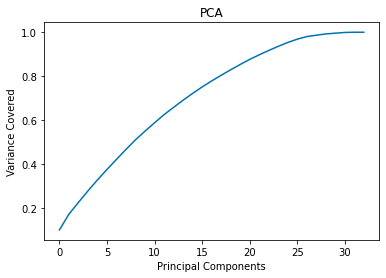

In [163]:
# lets plot scree plot to check the best components

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel("Variance Covered")
plt.title('PCA')
plt.show()

We see that in order to cover 95% - 100% of the data we need to have only have 22 features and we can remove the rest , We will use the Kbest to decide which features are the best and see if we should remove any feautes to reduce curse of dimentionality

In [164]:
best_features = SelectKBest(score_func = f_classif, k=33)

fit = best_features.fit(X,y)

df_scores = pd.DataFrame(fit.scores_)

df_columns = pd.DataFrame(X.columns)


#concatenate dataframes

feature_scores = pd.concat([df_columns, df_scores], axis = 1)

feature_scores.columns = ['Feature_name', 'Score']   #name output columns

print(feature_scores.nlargest(22,'Score'))  #Print Best 22 features

                   Feature_name       Score
16            incident_severity  196.960603
29                vehicle_claim   29.718214
26           total_claim_amount   27.463776
28               property_claim   19.327729
15               collision_type   12.252860
27                 injury_claim    8.328776
6                umbrella_limit    3.441452
21  number_of_vehicles_involved    2.689100
18               incident_state    2.644427
14                incident_type    2.539153
24                    witnesses    2.451026
13                incident_date    2.278427
17        authorities_contacted    2.098018
19                incident_city    1.631761
3                    policy_csl    1.382236
23              bodily_injuries    1.146656
7                   insured_sex    0.952144
22              property_damage    0.929077
2                  policy_state    0.865237
25      police_report_available    0.791953
30                    auto_make    0.756354
10         insured_relationship 

We wiil drop the rest of the features which are not in this list

we will also drop total claim amount as it is 98% correlated to the vehicle_claim and vehicle_claim is higher in score

In [165]:
new_X=df[['incident_severity','vehicle_claim','property_claim','collision_type','injury_claim','umbrella_limit','number_of_vehicles_involved','incident_state','incident_type','witnesses','incident_date','authorities_contacted','incident_city','policy_csl','bodily_injuries','insured_sex','property_damage','policy_state','police_report_available','auto_make','insured_relationship','fraud_reported']].copy()

In [166]:
new_X.head()

incident_severity  vehicle_claim  property_claim  collision_type  \
0                  0          52080           13020               3   
1                  1           3510             780               0   
2                  1          23100            3850               2   
3                  0          50720            6340               1   
4                  1           4550             650               0   

   injury_claim  umbrella_limit  number_of_vehicles_involved  incident_state  \
0          6510               0                            1               4   
1           780         5000000                            1               5   
2          7700         5000000                            3               1   
3          6340         6000000                            1               2   
4          1300         6000000                            1               1   

   incident_type  witnesses  ...  incident_city  policy_csl  bodily_injuries  \
0              2          2  ...              1           1                1   
1              3          0  ...              5           1                0   
2              0          3  ...              1           0                2   
3              2          2  ...              0           1                1   
4              3          1  ...              0           2                0   

   insured_sex  property_damage  policy_state  police_report_available  \
0            1                2             2                        2   
1            1                0             1                        0   
2            0                1             2                        1   
3            0                0             0                        1   
4            1                1             0                        1   

   auto_make  insured_relationship  fraud_reported  
0         10                     0               1  
1          8                     2               1  
2          4                     3               0  
3          3                     4               1  
4          0                     4               0  

[5 rows x 22 columns]

In [167]:
new_X.shape # we have created the new dtaset only with the nedde features using PCA as well as Kbest with classif

(1000, 22)

### Zscore to deal with the outliers in the data

In [168]:
new_X.shape

(1000, 22)

In [169]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(new_X))
threshold=3
np.where(z>3)

(array([ 31,  48,  88, 115, 119, 262, 314, 430, 458, 500, 503, 657, 700,
        875, 922, 975], dtype=int32),
 array([5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5], dtype=int32))

In [170]:
df_new_z=new_X[(z<3).all(axis=1)]
df_new_z

incident_severity  vehicle_claim  property_claim  collision_type  \
0                    0          52080           13020               3   
1                    1           3510             780               0   
2                    1          23100            3850               2   
3                    0          50720            6340               1   
4                    1           4550             650               0   
..                 ...            ...             ...             ...   
995                  1          61040            8720               1   
996                  0          72320           18080               2   
997                  1          52500            7500               3   
998                  0          36540            5220               2   
999                  1           3680             920               0   

     injury_claim  umbrella_limit  number_of_vehicles_involved  \
0            6510               0                            1   
1             780         5000000                            1   
2            7700         5000000                            3   
3            6340         6000000                            1   
4            1300         6000000                            1   
..            ...             ...                          ...   
995         17440               0                            1   
996         18080               0                            1   
997          7500         3000000                            3   
998          5220         5000000                            1   
999           460               0                            1   

     incident_state  incident_type  witnesses  ...  incident_city  policy_csl  \
0                 4              2          2  ...              1           1   
1                 5              3          0  ...              5           1   
2                 1              0          3  ...              1           0   
3                 2              2          2  ...              0           1   
4                 1              3          1  ...              0           2   
..              ...            ...        ...  ...            ...         ...   
995               0              2          1  ...              4           2   
996               4              2          3  ...              3           0   
997               0              0          3  ...              0           1   
998               1              2          1  ...              0           2   
999               6              1          3  ...              1           1   

     bodily_injuries  insured_sex  property_damage  policy_state  \
0                  1            1                2             2   
1                  0            1                0             1   
2                  2            0                1             2   
3                  1            0                0             0   
4                  0            1                1             0   
..               ...          ...              ...           ...   
995                0            0                2             2   
996                2            0                2             0   
997                2            0                0             2   
998                0            1                0             0   
999                0            0                0             2   

     police_report_available  auto_make  insured_relationship  fraud_reported  
0                          2         10                     0               1  
1                          0          8                     2               1  
2                          1          4                     3               0  
3                          1          3                     4               1  
4                          1          0                     4               0  
..                       ...        ...                   ...    

In [171]:
df_new_z.shape

(984, 22)

In [172]:
#Percentage of Data loss

Data_loss = ((1000-984)/1000)*100

In [173]:
Data_loss

1.6

We have lost 1.6% of the data as we have to remove the skewness which occured due to outliers so that the model is not biased towards it

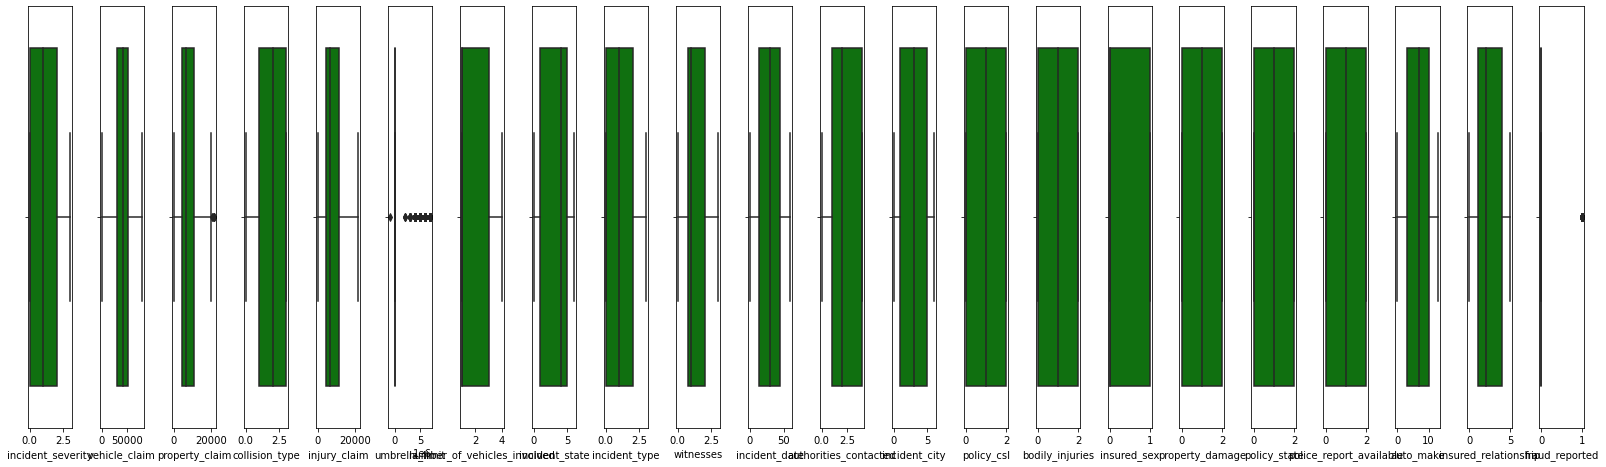

In [174]:
collist=df_new_z.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df_new_z[collist[i]],color='green',orient='h')
    plt.tight_layout()

<AxesSubplot:>

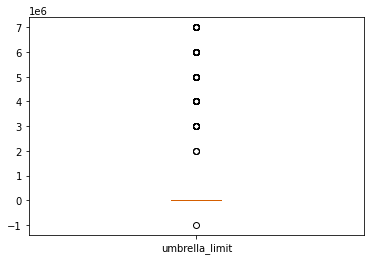

In [175]:
df_new_z['umbrella_limit'].plot.box()

After treating with Zscore we see much better data , the only columns we see there is some outliers are the categorical columns which we cannot do anything for as we need all the data and we only treat continuos data for outliers

#### Creating the Model for Label-Loan_Status - Choosing the Best Model

### Over Sampling using SMOTE


In [176]:
y.value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

As we see the dataset is imbalanced and we need to treat this or the model will give a good score but will be biased

In [177]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.75,random_state = 321)

In [178]:
from collections import Counter
Counter(y_train)

Counter({0: 560, 1: 190})

In [179]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

In [180]:
sm = SMOTE()

ove_smp = SMOTE()

X_train_ns,y_train_ns= ove_smp.fit_resample(X_train,y_train) # using resample as the sample did not work

print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 560, 1: 190})
The number of classes after fit Counter({0: 560, 1: 560})


In [181]:
from sklearn.preprocessing import StandardScaler # scale the data as we have very high values in fnlwgt

scaler = StandardScaler()
X_train_ns = pd.DataFrame(scaler.fit_transform(X_train_ns), columns = X_train_ns.columns)
X_test= pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_train_ns

months_as_customer       age  policy_state  policy_csl  \
0              -1.303020 -1.258680     -1.147243    1.558532   
1              -0.013508 -0.347639     -1.147243    1.558532   
2              -1.184966 -1.372561      0.105108    1.558532   
3              -0.249616 -0.347639     -1.147243   -1.042892   
4              -0.785399 -0.575400      1.357460   -1.042892   
...                  ...       ...           ...         ...   
1115           -1.293939 -0.461520      1.357460   -1.042892   
1116           -1.112318 -0.575400     -1.147243   -1.042892   
1117            0.258924  0.107881      0.105108   -1.042892   
1118           -1.511885 -1.030920      0.105108   -1.042892   
1119           -1.312101 -1.258680      0.105108   -1.042892   

      policy_deductable  policy_annual_premium  umbrella_limit  insured_sex  \
0             -0.246501               0.911500       -0.492877     1.247829   
1             -1.106595               1.567678        1.269127    -0.801392   
2              1.473686              -1.193902       -0.492877    -0.801392   
3             -1.106595               0.088878       -0.492877     1.247829   
4             -0.246501              -1.318116       -0.492877    -0.801392   
...                 ...                    ...             ...          ...   
1115           0.801093              -0.250834       -0.492877    -0.801392   
1116           0.592950               0.661643       -0.492877    -0.801392   
1117          -0.499369               0.304046        2.150128     1.247829   
1118           1.353273              -0.041232        2.150128     1.247829   
1119           1.423801              -0.202231       -0.492877    -0.801392   

      insured_education_level  insured_occupation  ...  bodily_injuries  \
0                    0.089793           -0.396955  ...         1.374837   
1                    0.630481            0.128565  ...         1.374837   
2                   -0.450895           -1.710752  ...        -1.149454   
3                   -0.991583            0.654084  ...         1.374837   
4                    0.630481           -1.447993  ...         0.112692   
...                       ...                 ...  ...              ...   
1115                 1.171169            0.654084  ...         0.112692   
1116                -0.450895           -0.134195  ...         1.374837   
1117                 0.089793           -1.185233  ...         0.112692   
1118                 0.630481           -1.185233  ...         0.112692   
1119                -0.991583           -0.922474  ...         0.112692   

      witnesses  police_report_available  total_claim_amount  injury_claim  \
0     -0.395209                 0.210882            0.224361     -0.576866   
1     -0.395209                 0.210882            0.908940      1.078948   
2     -1.336984                -1.094023            0.522004     -0.209856   
3     -0.395209                -1.094023            0.622459      1.057610   
4     -0.395209                 0.210882           -1.955051     -1.404774   
...         ...                      ...                 ...           ...   
1115   0.546566                 0.210882            0.707287      1.762398   
1116  -1.336984                -1.094023           -0.186677      0.298197   
1117  -1.336984                 0.210882            0.143873      0.833563   
1118   0.546566                -1.094023            0.669296     -0.064972   
1119  -0.395209                -1.094023           -0.447817     -0.737754   

      property_claim  vehicle_claim  auto_make  auto_model  auto_year  
0           0.533825       0.331403  -0.086274   -1.272705  -1.390287  
1           1.141328       0.682213  -0.349563   -0.311071   0.542498  
2          -0.188136       0.840193   1.756746    0.842889  -1.741703  
3          -0.273978       0.658980   1.493458   -0.791888  -1.214579  
4          -1.420750      -1.989518   1.493458   -0.118745   0.893913  
...              .

We have successfully balanced the data as well as scaled the data to start creating the model now

### Logistic Regression

In [182]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [183]:
scores=[]
for i in range(0,100):
    X_train_ns,X_test,y_train_ns,y_test = train_test_split(X,y,test_size = 0.25,random_state = i)
    lr.fit(X_train_ns,y_train_ns)
    pred_train = lr.predict(X_train_ns)
    pred_test=lr.predict(X_test)
    print(f"At random state {i},the training accuracy is :-{accuracy_score(y_train_ns,pred_train)}")
    print(f"At random state {i},the Testing accuracy is :-{accuracy_score(y_test,pred_test)}")
    print('\n')
    scores.append(accuracy_score(y_test,pred_test))

At random state 0,the training accuracy is :-0.7653333333333333
At random state 0,the Testing accuracy is :-0.72


At random state 1,the training accuracy is :-0.764
At random state 1,the Testing accuracy is :-0.72


At random state 2,the training accuracy is :-0.756
At random state 2,the Testing accuracy is :-0.74


At random state 3,the training accuracy is :-0.7586666666666667
At random state 3,the Testing accuracy is :-0.736


At random state 4,the training accuracy is :-0.7666666666666667
At random state 4,the Testing accuracy is :-0.712


At random state 5,the training accuracy is :-0.7586666666666667
At random state 5,the Testing accuracy is :-0.728


At random state 6,the training accuracy is :-0.7413333333333333
At random state 6,the Testing accuracy is :-0.784


At random state 7,the training accuracy is :-0.7586666666666667
At random state 7,the Testing accuracy is :-0.74


At random state 8,the training accuracy is :-0.7506666666666667
At random state 8,the Testing accuracy

In [184]:
# Finding the highest score using Argmax

np.argmax(scores)

79

In [185]:
scores[np.argmax(scores)]

0.812

We see that this model work well with the data , we see that the scores are the same at Training and testing state

At random state 63,the training accuracy is :-0.7546666666666667


 At random state 63,the Testing accuracy is :-0.752
 
 
the training score and Testing score are equal to each other here
both the train and test score are really good but we will test more an also th cv score to see if its consistent

### Train Test Split

In [186]:
X_train_ns,X_test,y_train_ns,y_test = train_test_split(X,y,test_size = 0.25,random_state = 55 ) 

# as the best random state we have chosen is 63

In [187]:
#Write one function and call as many times to check accuracy_score of different models

def metric_score(clf,X_train_ns,X_test,y_train_ns,y_test,train=True):
    if train:
        y_pred = clf.predict(X_train_ns)
    
        
        print("\n===============================Train Result=============================")
        
        print(f"Accuracy score : {accuracy_score(y_train_ns,y_pred) * 100: .2f}%")
        
    elif train == False:
        pred = clf.predict(X_test)
        
        print("\n===============================Test Result===============================")
        print(f"Accuracy Scorre : {accuracy_score(y_test,pred) * 100: .2f}%")
        
        
        print ('\n \n Test Classification Report \n', classification_report(y_test, pred, digits = 2)) ##Model Confidence /Accurancy
        

In [188]:
#Call the function and pass dataset to check the train score and the test score

metric_score(lr,X_train_ns,X_test,y_train_ns,y_test,train=True) #This is for the Training Score

metric_score(lr,X_train_ns,X_test,y_train_ns,y_test,train=False) #This is for the Testing Score


===============================Train Result=============================
Accuracy score :  75.47%

===============================Test Result===============================
Accuracy Scorre :  74.80%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.75      0.99      0.86       188
           1       0.00      0.00      0.00        62

    accuracy                           0.75       250
   macro avg       0.38      0.50      0.43       250
weighted avg       0.56      0.75      0.64       250



We see that this model is having a pretty good score in Logistic regression , we see the train score as 75.47% and the test score as 74.80% which is pretty good considering that this is actually a UPSIZED dataset and we have also done balancing of the label category due to imbalance

Important to note we have used a different random state as the one we chose was having a higher train score as compared to this one so we changed

In [189]:
print(confusion_matrix(y_test,pred_test))  

[[188   0]
 [ 62   0]]


### Cross-Validation of the model

In [190]:
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,X,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold{j} the cv score is {cv_mean} and accuracy score for training is {accuracy_score(y_train_ns,pred_train)}and the accuracy for testing is {accuracy_score(y_test,pred_test)}")
    print('\n')

At cross fold2 the cv score is 0.758 and accuracy score for training is 0.7506666666666667and the accuracy for testing is 0.752


At cross fold3 the cv score is 0.7429884974795155 and accuracy score for training is 0.7506666666666667and the accuracy for testing is 0.752


At cross fold4 the cv score is 0.7469999999999999 and accuracy score for training is 0.7506666666666667and the accuracy for testing is 0.752


At cross fold5 the cv score is 0.7489999999999999 and accuracy score for training is 0.7506666666666667and the accuracy for testing is 0.752


At cross fold6 the cv score is 0.7490080080802252 and accuracy score for training is 0.7506666666666667and the accuracy for testing is 0.752


At cross fold7 the cv score is 0.7490045166101503 and accuracy score for training is 0.7506666666666667and the accuracy for testing is 0.752


At cross fold8 the cv score is 0.749 and accuracy score for training is 0.7506666666666667and the accuracy for testing is 0.752


At cross fold9 the cv sco

We see that the model is overfitting the data as we see the cv score @ 6 of 75 % approx is giving a test score of 75.2% approx which is the same exact score , we feel this model is really good as off now as the difference is really close

### Decision Tree Classifier

In [191]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()

X_train_ns,X_test,y_train_ns,y_test = train_test_split(X,y,test_size = 0.25,random_state = 53) #as we have seen a good score on 98th state
dt.fit(X_train_ns,y_train_ns)
pred_train = dt.predict(X_train_ns)
pred_test = dt.predict(X_test)
print(f"At random state {53},the training accuracy is :-{accuracy_score(y_train_ns,pred_train)}")
print(f"At random state {53},the Testing accuracy is :-{accuracy_score(y_test,pred_test)}")
print('\n')


At random state 53,the training accuracy is :-1.0
At random state 53,the Testing accuracy is :-0.668




In [192]:
#Call the function and pass dataset to check the train score and the test score

metric_score(dt,X_train_ns,X_test,y_train_ns,y_test,train=True) #This is for the Training Score

metric_score(dt,X_train_ns,X_test,y_train_ns,y_test,train=False) #This is for the Testing Score


===============================Train Result=============================
Accuracy score :  100.00%

===============================Test Result===============================
Accuracy Scorre :  66.80%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.78      0.77      0.78       185
           1       0.36      0.37      0.37        65

    accuracy                           0.67       250
   macro avg       0.57      0.57      0.57       250
weighted avg       0.67      0.67      0.67       250



In [193]:
print(confusion_matrix(y_test,pred_test)) 

[[143  42]
 [ 41  24]]


Observations from the Decision Tree Classifier :-
    
- We see that the training score is boosted all the way to 100% which is the highest  but the testing score is fallen shorter than logistic regression  @ 72 % which is lesser than the logistic model   , also we see that the F1 score 64% and precision score is 64% same , overall not as good as Logistic regression

- the model is not performing as good as Logistic regression but we cant use this model moving to check the cv score

In [194]:
#Cross validation of the model
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(dt,X,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold{j} the cv score is {cv_mean} and accuracy score for training is {accuracy_score(y_train_ns,pred_train)}and the accuracy for testing is {accuracy_score(y_test,pred_test)}")
    print('\n')

At cross fold2 the cv score is 0.697 and accuracy score for training is 1.0and the accuracy for testing is 0.668


At cross fold3 the cv score is 0.696993400586215 and accuracy score for training is 1.0and the accuracy for testing is 0.668


At cross fold4 the cv score is 0.7169999999999999 and accuracy score for training is 1.0and the accuracy for testing is 0.668


At cross fold5 the cv score is 0.719 and accuracy score for training is 1.0and the accuracy for testing is 0.668


At cross fold6 the cv score is 0.7161099487771446 and accuracy score for training is 1.0and the accuracy for testing is 0.668


At cross fold7 the cv score is 0.6940594616650955 and accuracy score for training is 1.0and the accuracy for testing is 0.668


At cross fold8 the cv score is 0.714 and accuracy score for training is 1.0and the accuracy for testing is 0.668


At cross fold9 the cv score is 0.693014443014443 and accuracy score for training is 1.0and the accuracy for testing is 0.668




We see really good cv score at state 6 where the cv score is 0.72 and accuracy score for training is 1.0and the accuracy for testing is 0.70 so the closest state where test and cv score is present and this score is the same as the logistic regression score we got earlier, but the train and test are too far apart so we need to check other models as well

### KNN Classifier

In [195]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()

knn.fit(X_train_ns,y_train_ns)
knn.score(X_train_ns,y_train_ns)
pred_decision =knn.predict(X_test)

knns = accuracy_score(y_test,pred_decision)
print('Accuracy Score :',knns*100)

knnscore = cross_val_score(knn,X,y,cv=8)
knnc =knnscore.mean()
print('Cross Val Score :',knnc*100)
print(confusion_matrix(y_test,pred_decision)) 

Accuracy Score : 70.8
Cross Val Score : 70.89999999999999
[[171  14]
 [ 59   6]]


In [196]:
#Call the function and pass dataset to check the train score and the test score

metric_score(knn,X_train_ns,X_test,y_train_ns,y_test,train=True) #This is for the Training Score

metric_score(knn,X_train_ns,X_test,y_train_ns,y_test,train=False) #This is for the Testing Score


===============================Train Result=============================
Accuracy score :  78.40%

===============================Test Result===============================
Accuracy Scorre :  70.80%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.74      0.92      0.82       185
           1       0.30      0.09      0.14        65

    accuracy                           0.71       250
   macro avg       0.52      0.51      0.48       250
weighted avg       0.63      0.71      0.65       250



### Observations from the KNN Classifier :-
    
- We see that the training score is lesser than Decision tree @ 78.40%  train and test is 70.80% 

- the CV score is good though and very similar to the test accuracy @ 70% , so overall the model is ok , but we need to improve the f1 score and precision, but the logistic is the best till now @ 75.2%

- we see the confusion matrix where the typ 1 and typ 2 error is high but lesser thab the losistic regression and we nned to test other models 


### Random Forest Classifier

In [197]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

rf.fit(X_train_ns,y_train_ns)
rf.score(X_train_ns,y_train_ns)
pred_decision =rf.predict(X_test)

rfs = accuracy_score(y_test,pred_decision)
print('Accuracy Score :',rfs*100)

rfscore = cross_val_score(rf,X,y,cv=6)
rfc =rfscore.mean()
print('Cross Val Score :',rfc*100)
print(confusion_matrix(y_test,pred_decision)) 

Accuracy Score : 74.8
Cross Val Score : 76.70382127311642
[[169  16]
 [ 47  18]]


In [198]:
#Call the function and pass dataset to check the train score and the test score

metric_score(rf,X_train_ns,X_test,y_train_ns,y_test,train=True) #This is for the Training Score

metric_score(rf,X_train_ns,X_test,y_train_ns,y_test,train=False) #This is for the Testing Score


===============================Train Result=============================
Accuracy score :  100.00%

===============================Test Result===============================
Accuracy Scorre :  74.80%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       185
           1       0.53      0.28      0.36        65

    accuracy                           0.75       250
   macro avg       0.66      0.60      0.60       250
weighted avg       0.72      0.75      0.72       250



### Observations from the Random Forest Classifier :-

- We see that like the decision tree the train score is at the max at 100% and we have test score much better at 76.80% , the F1 score is at 75% and precisiion @ 75% which is a good model and the best till now , we have imbalance dataset and we treated so we have a little higher Cv score of 77.20% approx so we are getting a good cv score as well which is on par with the test sore which is what we need the model to do 

- the model has much lower errors in the confusion matrix with all models except knn classifier


### SVC

In [199]:
from sklearn.svm import SVC

svc= SVC()

svc.fit(X_train_ns,y_train_ns)
svc.score(X_train_ns,y_train_ns)
pred_decision =svc.predict(X_test)

svcs = accuracy_score(y_test,pred_decision)
print('Accuracy Score :',svcs*100)

svcscore = cross_val_score(svc,X,y,cv=4)
svcc =svcscore.mean()
print('Cross Val Score :',svcc*100)
print(confusion_matrix(y_test,pred_decision))

Accuracy Score : 74.0
Cross Val Score : 75.30000000000001
[[185   0]
 [ 65   0]]


In [200]:
#Call the function and pass dataset to check the train score and the test score

metric_score(svc,X_train_ns,X_test,y_train_ns,y_test,train=True) #This is for the Training Score

metric_score(svc,X_train_ns,X_test,y_train_ns,y_test,train=False) #This is for the Testing Score


===============================Train Result=============================
Accuracy score :  75.73%

===============================Test Result===============================
Accuracy Scorre :  74.00%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.74      1.00      0.85       185
           1       0.00      0.00      0.00        65

    accuracy                           0.74       250
   macro avg       0.37      0.50      0.43       250
weighted avg       0.55      0.74      0.63       250



### Observations from the SVC Classifier :-
    
- We see that this model is  performimg mediocre  than all the other models we tested where the train score is 75% and the test is 74% F1 score is less and precioson is 63% whic is less , the cv score is also on the higher side @75% means its a little overfitted, 

- we cant assume that any model here is the best till the ROC AUC analysis as all models are having their ups and downs , we see that random forest to be good as cv and test is highest , for best reliability we see knn as a contender , so we will move to ROC & AUC analysis

### Let's check ROC AUC Curve for the fitted Model

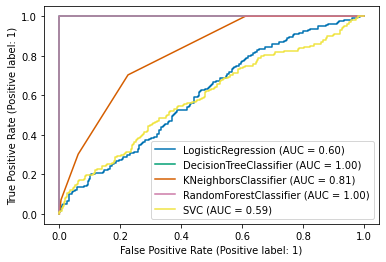

In [201]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt


### How well our model works on training Data

disp = plot_roc_curve(lr,X_train_ns,y_train_ns)

plot_roc_curve(dt,X_train_ns,y_train_ns, ax= disp.ax_) #ax_ = Axes with confusion matrix

plot_roc_curve(knn,X_train_ns,y_train_ns, ax= disp.ax_)

plot_roc_curve(rf,X_train_ns,y_train_ns, ax= disp.ax_)

plot_roc_curve(svc,X_train_ns,y_train_ns, ax= disp.ax_)

plt.legend(prop={'size' : 10}, loc='lower right' )

plt.show()

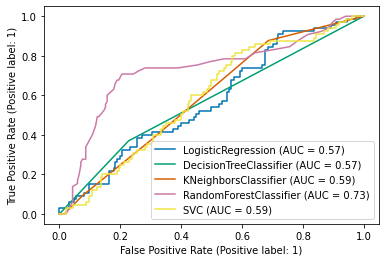

In [202]:
### How well our model works on Testing Data

disp = plot_roc_curve(lr,X_test,y_test)

plot_roc_curve(dt,X_test,y_test, ax= disp.ax_) #ax_ = Axes with confusion matrix

plot_roc_curve(knn,X_test,y_test, ax= disp.ax_)

plot_roc_curve(rf,X_test,y_test, ax= disp.ax_)

plot_roc_curve(svc,X_test,y_test, ax= disp.ax_)

plt.legend(prop={'size' : 10}, loc='lower right' )

plt.show()

### We will go with Random Forest classifier model as :-
    
the model gives the highest accuracy and other f1 and preciosn scores

the model has lowest error in the confusion matrix

the model is shown that it has train 100% and 75% in ROC AUC , in which Random forest is the best.

we also see that the other models we test may have closer scores like Logistic regression but the score is very low and we cant go with it

Overall we need to improve the cvscore and accuracy in Random Forest and if we can do hyperparameter tuning to do it , this will be the best model we can choose

In [205]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestClassifier()

#Creating parameters to pass in GridSearchCV

parameters = {'criterion':['gini','entropy'],
             'max_features':['auto','sqrt','log2'],
             'min_samples_split':range(2,5),
             'min_samples_leaf': range(3,6),
             'n_estimators' : [100,200,300,400,500]
             }

GCV = GridSearchCV(estimator = rf,param_grid=parameters, verbose=2, n_jobs = -1, scoring='accuracy')
GCV.fit(X_train_ns,y_train_ns) #fitting data into the model
GCV.best_params_ #printing the best parameters found by the RandomizedSearchCV

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


{'criterion': 'entropy',
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 100}

In [207]:
rf=RandomForestClassifier(n_estimators = 300 ,min_samples_split=4,min_samples_leaf=1,max_features='auto',criterion='entropy')

rf.fit(X_train_ns,y_train_ns)
rf.score(X_train_ns,y_train_ns)
pred_decision =rf.predict(X_test)

rfs = accuracy_score(y_test,pred_decision)
print('Accuracy Score :',rfs*100)

rfscore = cross_val_score(rf,X,y,cv=9)
rfc =rfscore.mean()
print('Cross Val Score :',rfc*100)
print(confusion_matrix(y_test,pred_test)) 

Accuracy Score : 76.0
Cross Val Score : 76.70348920348921
[[143  42]
 [ 41  24]]


We observe that for Tuned Random Forest Regressor :-
    
we are getting similar scores same as the previous one we made

this is the exact model score which we have been able to get at test score @ 76.0% whcih is really good for the model, we also see that this is the beyond 50% and this model is potential to make it to the production unless we get better in future models

we see that the cross val scoree is also good @76.70% and is close to the accuracy score with the same cv 8 we used earlier

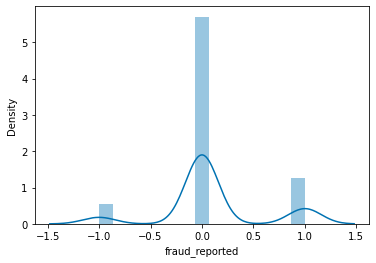

In [208]:
#Plotting distplot to show equillibrium 

sns.distplot(y_test-pred_decision)
plt.show()

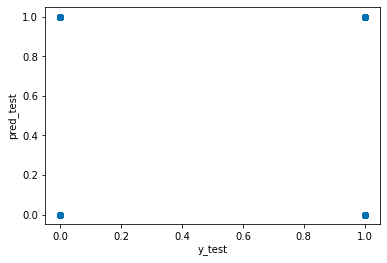

In [209]:
plt.scatter(y_test, pred_decision, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("pred_test")
plt.show()

We see that the model is accurate as the points in 0 are shown in 0 and 1 in 1 and the graph shows noraml distribution as well 

In [211]:
import pickle
filename = 'fraudauto.pkl'
pickle.dump(rf,open(filename,'wb'))

### Conclusion

In [212]:
loaded_model = pickle.load(open('fraudauto.pkl','rb'))
result = loaded_model.score(X_test,y_test)
print(result*100)

76.0


In [213]:
conclusion = pd.DataFrame([loaded_model.predict(X_test)[:],pred_decision[:]],index=['Predicted','Orignal'])

In [214]:
conclusion

0    1    2    3    4    5    6    7    8    9    ...  240  241  \
Predicted    0    0    0    1    0    0    0    0    1    0  ...    0    0   
Orignal      0    0    0    1    0    0    0    0    1    0  ...    0    0   

           242  243  244  245  246  247  248  249  
Predicted    1    0    0    0    0    0    0    0  
Orignal      1    0    0    0    0    0    0    0  

[2 rows x 250 columns]

# We have 250 columns where the model has predicted and Actuals and the model we have chosen is Random Forest Classifier as the ideal model for this project